With over 40 columns, this dataset supports a wide array of analysis types. Analysts can explore questions like “Do certain species migrate in larger flocks?”, “How does weather impact nesting success?”, or “What conditions lead to migration interruptions?”. Users can also perform geospatial mapping of start and end locations, cluster birds by behavior, or build time series models based on migration months and environmental factors.

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
df = pd.read_csv('./data/bird_migration_data.csv')
df

,Bird_ID,Species,Region,Habitat,Weather_Condition,Migration_Reason,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,...,Tracking_Quality,Migration_Interrupted,Interrupted_Reason,Tagged_By,Tag_Weight_g,Migration_Success,Recovery_Location_Known,Recovery_Time_days,Observation_Counts,Observation_Quality
0,B1000,Warbler,South America,Grassland,Stormy,Feeding,11.906566,-169.378251,30.377647,-21.366879,...,Excellent,Yes,Storm,Researcher_A,27.0,Failed,No,102,56,Low
1,B1001,Stork,North America,Grassland,Stormy,Breeding,62.301546,-111.475069,39.921092,47.963436,...,Good,Yes,Injury,Researcher_C,14.2,Successful,Yes,118,61,Low
2,B1002,Hawk,South America,Mountain,Stormy,Avoid Predators,87.861164,-78.727327,66.990980,19.448466,...,Fair,No,Lost Signal,Researcher_B,16.1,Failed,No,41,71,High
3,B1003,Warbler,South America,Urban,Stormy,Climate Change,35.770590,153.104341,-49.003145,-157.868744,...,Good,Yes,Lost Signal,Researcher_C,24.4,Successful,No,15,68,Low
4,B1004,Crane,Europe,Urban,Windy,Avoid Predators,-21.611614,106.674824,11.681051,-115.022863,...,Good,No,NaN,Researcher_B,25.8,Failed,Yes,73,67,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,B10995,Crane,Africa,Wetland,Windy,Climate Change,-80.397410,87.638661,74.628139,-1.283046,...,Good,Yes,Predator,Researcher_C,20.6,Successful,No,99,59,Low
9996,B10996,Hawk,Europe,Forest,Windy,Avoid Predators,-47.192670,2.850794,20.149497,-77.025629,...,Poor,Yes,Predator,Researcher_B,7.8,Failed,No,117,82,Moderate
9997,B10997,Goose,Europe,Wetland,Stormy,Avoid Predators,32.392299,-32.037925,28.625721,-13.844319,...,Excellent,No,Lost Signal,Researcher_B,17.8,Failed,No,79,66,High
9998,B10998,Crane,South America,Mountain,Stormy,Breeding,-41.145112,84.837740,74.612320,-74.675591,...,Poor,Yes,Lost Signal,Researcher_C,5.5,Successful,No,29,18,High


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Bird_ID                  10000 non-null  object 
 1   Species                  10000 non-null  object 
 2   Region                   10000 non-null  object 
 3   Habitat                  10000 non-null  object 
 4   Weather_Condition        10000 non-null  object 
 5   Migration_Reason         10000 non-null  object 
 6   Start_Latitude           10000 non-null  float64
 7   Start_Longitude          10000 non-null  float64
 8   End_Latitude             10000 non-null  float64
 9   End_Longitude            10000 non-null  float64
 10  Flight_Distance_km       10000 non-null  float64
 11  Flight_Duration_hours    10000 non-null  float64
 12  Average_Speed_kmph       10000 non-null  float64
 13  Max_Altitude_m           10000 non-null  int64  
 14  Min_Altitude_m         

In [177]:
df.describe()

,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Flight_Distance_km,Flight_Duration_hours,Average_Speed_kmph,Max_Altitude_m,Min_Altitude_m,Temperature_C,...,Pressure_hPa,Visibility_km,Tag_Battery_Level_%,Signal_Strength_dB,Rest_Stops,Predator_Sightings,Flock_Size,Tag_Weight_g,Recovery_Time_days,Observation_Counts
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.321812,-0.394588,0.084391,0.467617,2504.036134,49.994020,49.953394,5504.80830,500.111800,12.566930,...,1000.440810,10.636970,54.651800,-69.8408,7.380000,4.490200,248.714500,17.605870,60.490800,49.872800
std,51.919190,104.083440,51.709437,103.438134,499.723298,10.026108,5.085296,2595.28577,229.782907,13.073405,...,28.959614,5.504623,25.839271,9.9189,4.023583,2.872826,144.943771,7.200088,34.434028,28.601997
min,-89.999003,-179.993975,-89.998482,-179.902756,527.700000,12.600000,30.430000,1000.00000,100.000000,-10.000000,...,950.000000,1.000000,10.000000,-107.9000,1.000000,0.000000,1.000000,5.000000,1.000000,1.000000
25%,-45.390697,-91.444680,-43.664719,-88.871564,2169.632500,43.200000,46.530000,3277.75000,300.000000,1.200000,...,975.000000,5.900000,32.000000,-76.6000,4.000000,2.000000,124.000000,11.400000,31.000000,25.000000
50%,-0.138849,-0.479892,-0.163116,1.280823,2511.150000,50.050000,50.040000,5521.00000,501.000000,12.500000,...,1000.950000,10.700000,55.000000,-69.8000,7.000000,5.000000,248.000000,17.700000,61.000000,50.000000
75%,44.480926,89.640253,44.957102,91.196076,2841.452500,56.800000,53.360000,7740.25000,698.000000,24.000000,...,1025.500000,15.400000,77.000000,-63.1000,11.000000,7.000000,376.000000,24.000000,91.000000,74.000000
max,89.980302,179.989973,89.989145,179.955036,4428.320000,91.000000,68.950000,9999.00000,899.000000,35.000000,...,1050.000000,20.000000,99.000000,-33.3000,14.000000,9.000000,499.000000,30.000000,119.000000,99.000000


In [178]:
objects = df.select_dtypes(include=['object']).columns
objects

Index(['Bird_ID', 'Species', 'Region', 'Habitat', 'Weather_Condition',
       'Migration_Reason', 'Nesting_Success', 'Migration_Start_Month',
       'Migration_End_Month', 'Tag_Type', 'Migrated_in_Flock',
       'Food_Supply_Level', 'Tracking_Quality', 'Migration_Interrupted',
       'Interrupted_Reason', 'Tagged_By', 'Migration_Success',
       'Recovery_Location_Known', 'Observation_Quality'],
      dtype='object')

In [179]:
df.isnull().sum()

Bird_ID                       0
Species                       0
Region                        0
Habitat                       0
Weather_Condition             0
Migration_Reason              0
Start_Latitude                0
Start_Longitude               0
End_Latitude                  0
End_Longitude                 0
Flight_Distance_km            0
Flight_Duration_hours         0
Average_Speed_kmph            0
Max_Altitude_m                0
Min_Altitude_m                0
Temperature_C                 0
Wind_Speed_kmph               0
Humidity_%                    0
Pressure_hPa                  0
Visibility_km                 0
Nesting_Success               0
Tag_Battery_Level_%           0
Signal_Strength_dB            0
Migration_Start_Month         0
Migration_End_Month           0
Rest_Stops                    0
Predator_Sightings            0
Tag_Type                      0
Migrated_in_Flock             0
Flock_Size                    0
Food_Supply_Level             0
Tracking

In [180]:
df.duplicated().sum()

np.int64(0)

In [181]:
df.columns

Index(['Bird_ID', 'Species', 'Region', 'Habitat', 'Weather_Condition',
       'Migration_Reason', 'Start_Latitude', 'Start_Longitude', 'End_Latitude',
       'End_Longitude', 'Flight_Distance_km', 'Flight_Duration_hours',
       'Average_Speed_kmph', 'Max_Altitude_m', 'Min_Altitude_m',
       'Temperature_C', 'Wind_Speed_kmph', 'Humidity_%', 'Pressure_hPa',
       'Visibility_km', 'Nesting_Success', 'Tag_Battery_Level_%',
       'Signal_Strength_dB', 'Migration_Start_Month', 'Migration_End_Month',
       'Rest_Stops', 'Predator_Sightings', 'Tag_Type', 'Migrated_in_Flock',
       'Flock_Size', 'Food_Supply_Level', 'Tracking_Quality',
       'Migration_Interrupted', 'Interrupted_Reason', 'Tagged_By',
       'Tag_Weight_g', 'Migration_Success', 'Recovery_Location_Known',
       'Recovery_Time_days', 'Observation_Counts', 'Observation_Quality'],
      dtype='object')

So there is no duplicated and na values

In [182]:
# Feature Engineering
# create a new column for speed
df['Speed (kmph)'] = df['Flight_Distance_km'] / df['Flight_Duration_hours']
df['Speed (kmph)'].describe()

count    10000.000000
mean        52.379806
std         16.124263
min         10.252868
25%         41.413355
50%         50.229689
75%         60.680402
max        181.598639
Name: Speed (kmph), dtype: float64

Text(0.5, 1.0, 'Speed Distribution of Birds')

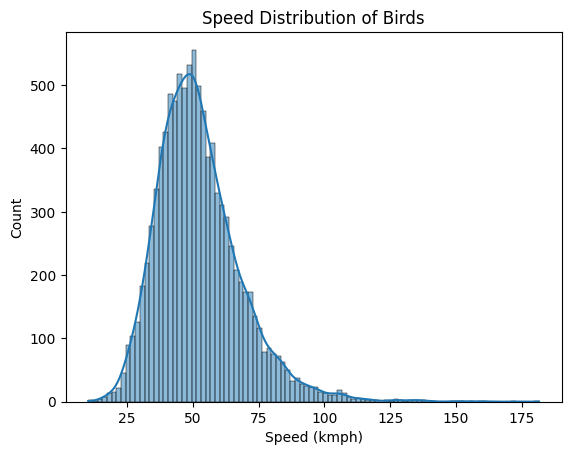

In [183]:
sns.histplot(df['Speed (kmph)'], kde = True)
plt.title('Speed Distribution of Birds')

Outlier Detection and Removal

In [184]:
# outliers in speed in iqr method
Q1 = df['Speed (kmph)'].quantile(0.25)
Q3 = df['Speed (kmph)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Speed (kmph)'] < lower_bound) | (df['Speed (kmph)'] > upper_bound)]
outliers.shape

(264, 42)

In [185]:
# apply z-score method to find outliers
from scipy import stats
z_scores = np.abs(stats.zscore(df['Speed (kmph)']))
outliers_z = df[(z_scores > 3)]
outliers_z.shape

(118, 42)

In [186]:
# apply percentile method to find outliers
lower_percentile = df['Speed (kmph)'].quantile(0.01)
upper_percentile = df['Speed (kmph)'].quantile(0.99)
outliers_percentile = df[(df['Speed (kmph)'] < lower_percentile) | (df['Speed (kmph)'] > upper_percentile)]
outliers_percentile.shape

(200, 42)

In [187]:
df.drop(outliers.index, inplace=True)

In [188]:
df

,Bird_ID,Species,Region,Habitat,Weather_Condition,Migration_Reason,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,...,Migration_Interrupted,Interrupted_Reason,Tagged_By,Tag_Weight_g,Migration_Success,Recovery_Location_Known,Recovery_Time_days,Observation_Counts,Observation_Quality,Speed (kmph)
0,B1000,Warbler,South America,Grassland,Stormy,Feeding,11.906566,-169.378251,30.377647,-21.366879,...,Yes,Storm,Researcher_A,27.0,Failed,No,102,56,Low,35.430101
1,B1001,Stork,North America,Grassland,Stormy,Breeding,62.301546,-111.475069,39.921092,47.963436,...,Yes,Injury,Researcher_C,14.2,Successful,Yes,118,61,Low,70.781996
3,B1003,Warbler,South America,Urban,Stormy,Climate Change,35.770590,153.104341,-49.003145,-157.868744,...,Yes,Lost Signal,Researcher_C,24.4,Successful,No,15,68,Low,39.478365
4,B1004,Crane,Europe,Urban,Windy,Avoid Predators,-21.611614,106.674824,11.681051,-115.022863,...,No,NaN,Researcher_B,25.8,Failed,Yes,73,67,Moderate,54.084007
5,B1005,Hawk,Europe,Grassland,Stormy,Climate Change,-15.871617,138.292231,18.594214,-175.116068,...,No,Lost Signal,Researcher_B,18.5,Failed,No,37,63,Moderate,56.476749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,B10995,Crane,Africa,Wetland,Windy,Climate Change,-80.397410,87.638661,74.628139,-1.283046,...,Yes,Predator,Researcher_C,20.6,Successful,No,99,59,Low,44.994084
9996,B10996,Hawk,Europe,Forest,Windy,Avoid Predators,-47.192670,2.850794,20.149497,-77.025629,...,Yes,Predator,Researcher_B,7.8,Failed,No,117,82,Moderate,47.962810
9997,B10997,Goose,Europe,Wetland,Stormy,Avoid Predators,32.392299,-32.037925,28.625721,-13.844319,...,No,Lost Signal,Researcher_B,17.8,Failed,No,79,66,High,52.245675
9998,B10998,Crane,South America,Mountain,Stormy,Breeding,-41.145112,84.837740,74.612320,-74.675591,...,Yes,Lost Signal,Researcher_C,5.5,Successful,No,29,18,High,48.609124


In [189]:
df = df.drop(columns = ["Bird_ID"])
df

,Species,Region,Habitat,Weather_Condition,Migration_Reason,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Flight_Distance_km,...,Migration_Interrupted,Interrupted_Reason,Tagged_By,Tag_Weight_g,Migration_Success,Recovery_Location_Known,Recovery_Time_days,Observation_Counts,Observation_Quality,Speed (kmph)
0,Warbler,South America,Grassland,Stormy,Feeding,11.906566,-169.378251,30.377647,-21.366879,1753.79,...,Yes,Storm,Researcher_A,27.0,Failed,No,102,56,Low,35.430101
1,Stork,North America,Grassland,Stormy,Breeding,62.301546,-111.475069,39.921092,47.963436,3263.05,...,Yes,Injury,Researcher_C,14.2,Successful,Yes,118,61,Low,70.781996
3,Warbler,South America,Urban,Stormy,Climate Change,35.770590,153.104341,-49.003145,-157.868744,2317.38,...,Yes,Lost Signal,Researcher_C,24.4,Successful,No,15,68,Low,39.478365
4,Crane,Europe,Urban,Windy,Avoid Predators,-21.611614,106.674824,11.681051,-115.022863,3077.38,...,No,NaN,Researcher_B,25.8,Failed,Yes,73,67,Moderate,54.084007
5,Hawk,Europe,Grassland,Stormy,Climate Change,-15.871617,138.292231,18.594214,-175.116068,2987.62,...,No,Lost Signal,Researcher_B,18.5,Failed,No,37,63,Moderate,56.476749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Crane,Africa,Wetland,Windy,Climate Change,-80.397410,87.638661,74.628139,-1.283046,2357.69,...,Yes,Predator,Researcher_C,20.6,Successful,No,99,59,Low,44.994084
9996,Hawk,Europe,Forest,Windy,Avoid Predators,-47.192670,2.850794,20.149497,-77.025629,2901.75,...,Yes,Predator,Researcher_B,7.8,Failed,No,117,82,Moderate,47.962810
9997,Goose,Europe,Wetland,Stormy,Avoid Predators,32.392299,-32.037925,28.625721,-13.844319,3019.80,...,No,Lost Signal,Researcher_B,17.8,Failed,No,79,66,High,52.245675
9998,Crane,South America,Mountain,Stormy,Breeding,-41.145112,84.837740,74.612320,-74.675591,2663.78,...,Yes,Lost Signal,Researcher_C,5.5,Successful,No,29,18,High,48.609124


Specieswise Exploration

In [190]:
unique_species = df['Species'].nunique()
unique_species

7

In [191]:
species_counts = df['Species'].value_counts()
species_counts

Species
Hawk       1424
Stork      1403
Warbler    1390
Swallow    1389
Eagle      1388
Goose      1384
Crane      1358
Name: count, dtype: int64

In [192]:
df_Hawk = df[df['Species'] == 'Hawk']
df_Stork = df[df['Species'] == 'Stork']
df_warbler = df[df['Species'] == 'Warbler']
df_Swallow = df[df['Species'] == 'Swallow']
df_Eagle = df[df['Species'] == 'Eagle']
df_Goose = df[df['Species'] == 'Goose']
df_Crane = df[df['Species'] == 'Crane']

In [193]:
df_Hawk.describe()

,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Flight_Distance_km,Flight_Duration_hours,Average_Speed_kmph,Max_Altitude_m,Min_Altitude_m,Temperature_C,...,Visibility_km,Tag_Battery_Level_%,Signal_Strength_dB,Rest_Stops,Predator_Sightings,Flock_Size,Tag_Weight_g,Recovery_Time_days,Observation_Counts,Speed (kmph)
count,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,...,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000
mean,-1.754063,-1.672068,-1.622733,-4.591568,2499.778511,50.316152,49.867086,5569.910112,489.877107,12.629354,...,10.695646,54.333567,-69.773806,7.422753,4.498596,248.162921,17.510604,60.388343,49.447331,51.383321
std,51.376102,104.225961,51.430703,101.191623,491.031400,9.435271,5.147201,2562.345380,229.476075,13.132448,...,5.437950,25.945542,9.883025,3.963777,2.894733,143.681678,7.187827,34.294539,28.816404,13.649841
min,-89.766742,-179.993975,-89.998482,-179.307138,734.060000,21.300000,32.940000,1013.000000,100.000000,-10.000000,...,1.000000,10.000000,-103.500000,1.000000,0.000000,1.000000,5.000000,1.000000,1.000000,15.519239
25%,-47.540035,-94.439704,-44.405634,-91.812209,2186.232500,43.600000,46.437500,3433.000000,292.750000,1.200000,...,6.000000,32.000000,-76.400000,4.000000,2.000000,125.000000,11.400000,30.000000,24.000000,41.618014
50%,-0.713005,-1.760269,-1.624903,-5.146269,2504.430000,50.200000,49.970000,5628.000000,481.000000,12.700000,...,11.000000,55.000000,-69.400000,7.000000,5.000000,244.000000,17.350000,59.500000,49.000000,50.177933
75%,42.769671,90.522109,41.808797,84.221584,2816.505000,57.000000,53.435000,7784.250000,688.000000,24.100000,...,15.300000,76.000000,-63.000000,11.000000,7.000000,371.250000,23.800000,91.000000,74.250000,59.721941
max,89.776359,178.996954,89.949190,179.057309,4214.800000,87.200000,66.800000,9995.000000,899.000000,35.000000,...,20.000000,99.000000,-39.200000,14.000000,9.000000,499.000000,30.000000,119.000000,99.000000,89.417747


C:\Users\ratul\AppData\Local\Temp\ipykernel_10276\985108202.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Speed (kmph)', y='Species', data=Birds, palette='viridis')


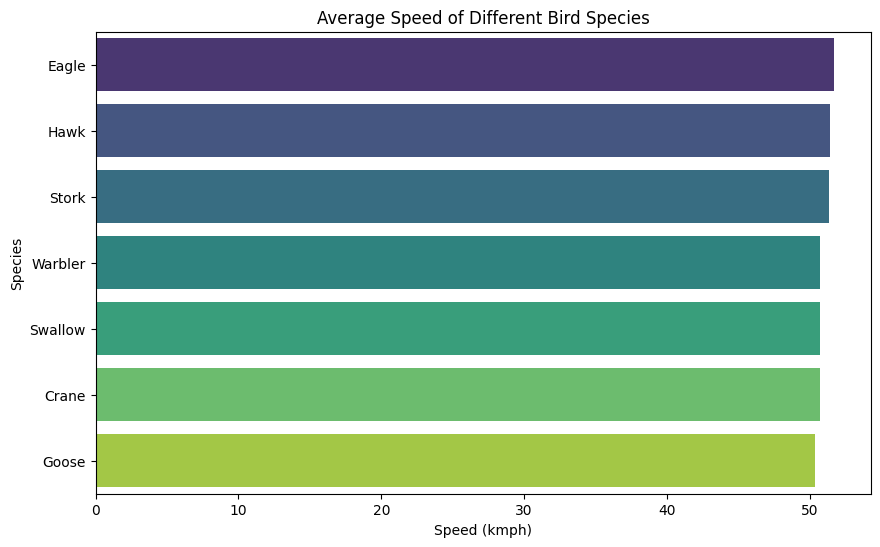

In [194]:
# speed distribution of Each Species
Birds = df.groupby('Species')['Speed (kmph)'].mean().reset_index()
Birds = Birds.sort_values(by='Speed (kmph)', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Speed (kmph)', y='Species', data=Birds, palette='viridis')
plt.title('Average Speed of Different Bird Species')
plt.xlabel('Speed (kmph)')
plt.ylabel('Species')
plt.show()

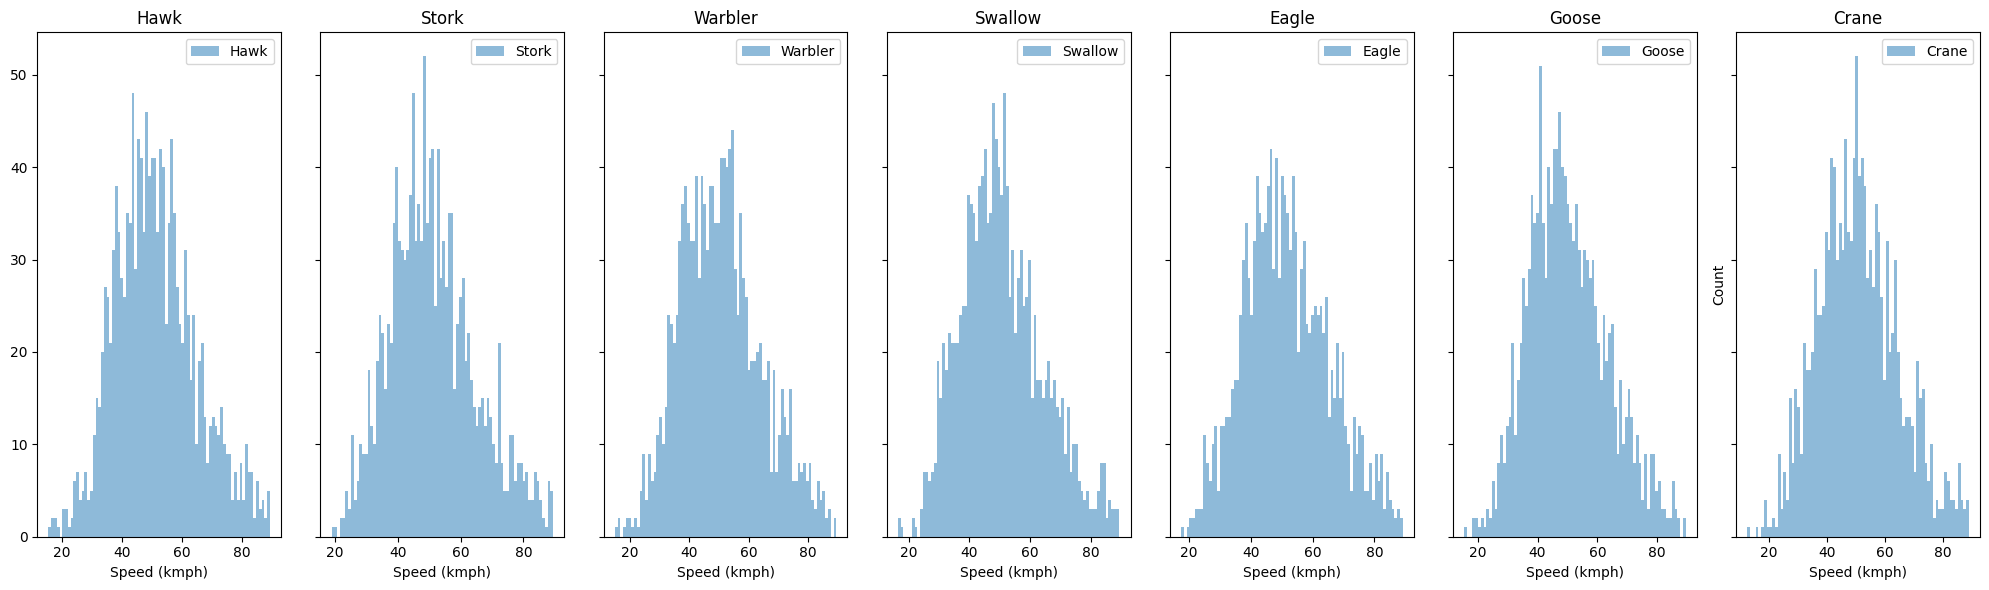

In [195]:
# Average speed of each species on histogram
Birds = [df_Hawk, df_Stork, df_warbler, df_Swallow, df_Eagle, df_Goose, df_Crane]
name = ['Hawk', 'Stork', 'Warbler', 'Swallow', 'Eagle', 'Goose', 'Crane']
fig, ax = plt.subplots(1, len(Birds), figsize=(20, 6), sharey=True)
for i, axis in enumerate(ax):
    axis.set_title(name[i])
    axis.set_xlabel('Speed (kmph)')
    axis.hist(Birds[i]['Speed (kmph)'], bins=80, alpha=0.5, label=name[i])
    axis.legend()
axis.set_ylabel('Count')
plt.tight_layout()  
plt.show()

In [196]:
df_Goose.describe()

,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Flight_Distance_km,Flight_Duration_hours,Average_Speed_kmph,Max_Altitude_m,Min_Altitude_m,Temperature_C,...,Visibility_km,Tag_Battery_Level_%,Signal_Strength_dB,Rest_Stops,Predator_Sightings,Flock_Size,Tag_Weight_g,Recovery_Time_days,Observation_Counts,Speed (kmph)
count,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,...,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000
mean,1.894412,3.741226,-0.240647,3.792243,2480.700650,50.811994,49.967384,5473.523844,496.244220,12.035549,...,10.928251,54.859827,-70.020592,7.358382,4.528179,249.395954,17.508309,60.800578,50.070809,50.357343
std,51.984398,102.984974,51.907902,103.271618,498.141954,9.237647,5.157468,2635.622903,226.170048,13.133930,...,5.511111,25.684171,10.026341,3.996586,2.919367,143.454798,7.213722,34.219623,28.414796,13.237470
min,-89.875715,-179.344697,-89.777898,-179.685879,965.890000,24.900000,30.770000,1005.000000,100.000000,-10.000000,...,1.000000,10.000000,-99.000000,1.000000,0.000000,1.000000,5.000000,1.000000,1.000000,15.493557
25%,-43.004734,-83.946981,-43.364177,-85.844738,2130.480000,44.400000,46.552500,3239.250000,303.750000,0.500000,...,6.400000,33.000000,-76.825000,4.000000,2.000000,130.000000,11.375000,31.000000,25.000000,40.720391
50%,2.748311,3.253496,-0.909236,6.513428,2500.235000,51.000000,50.015000,5516.500000,494.500000,11.500000,...,11.200000,55.000000,-70.300000,7.000000,4.000000,249.500000,17.300000,62.000000,50.000000,48.821725
75%,47.061359,93.231076,45.771063,95.720837,2833.337500,57.100000,53.395000,7741.250000,685.000000,23.700000,...,15.800000,77.000000,-63.200000,11.000000,7.000000,375.250000,23.800000,90.250000,74.000000,58.755891
max,89.790797,179.942868,89.989145,179.955036,3883.160000,83.700000,65.210000,9998.000000,899.000000,35.000000,...,20.000000,99.000000,-37.700000,14.000000,9.000000,499.000000,30.000000,119.000000,99.000000,89.532219


In [197]:
# Check by observation quality
df['Observation_Quality'].value_counts()

Observation_Quality
Low         3343
High        3261
Moderate    3132
Name: count, dtype: int64

In [198]:
# Do Certain species fly in larger flocks than others?
df['Flock_Size'].describe()

count    9736.000000
mean      248.384963
std       144.855615
min         1.000000
25%       124.000000
50%       247.000000
75%       375.000000
max       499.000000
Name: Flock_Size, dtype: float64

<Axes: xlabel='Flock_Size', ylabel='Count'>

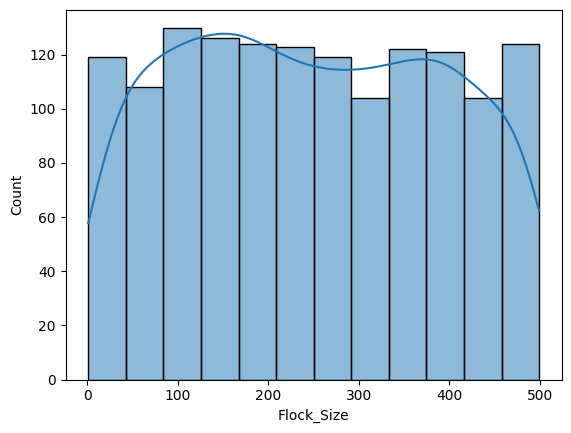

In [199]:
sns.histplot(df_Hawk['Flock_Size'], kde = True)

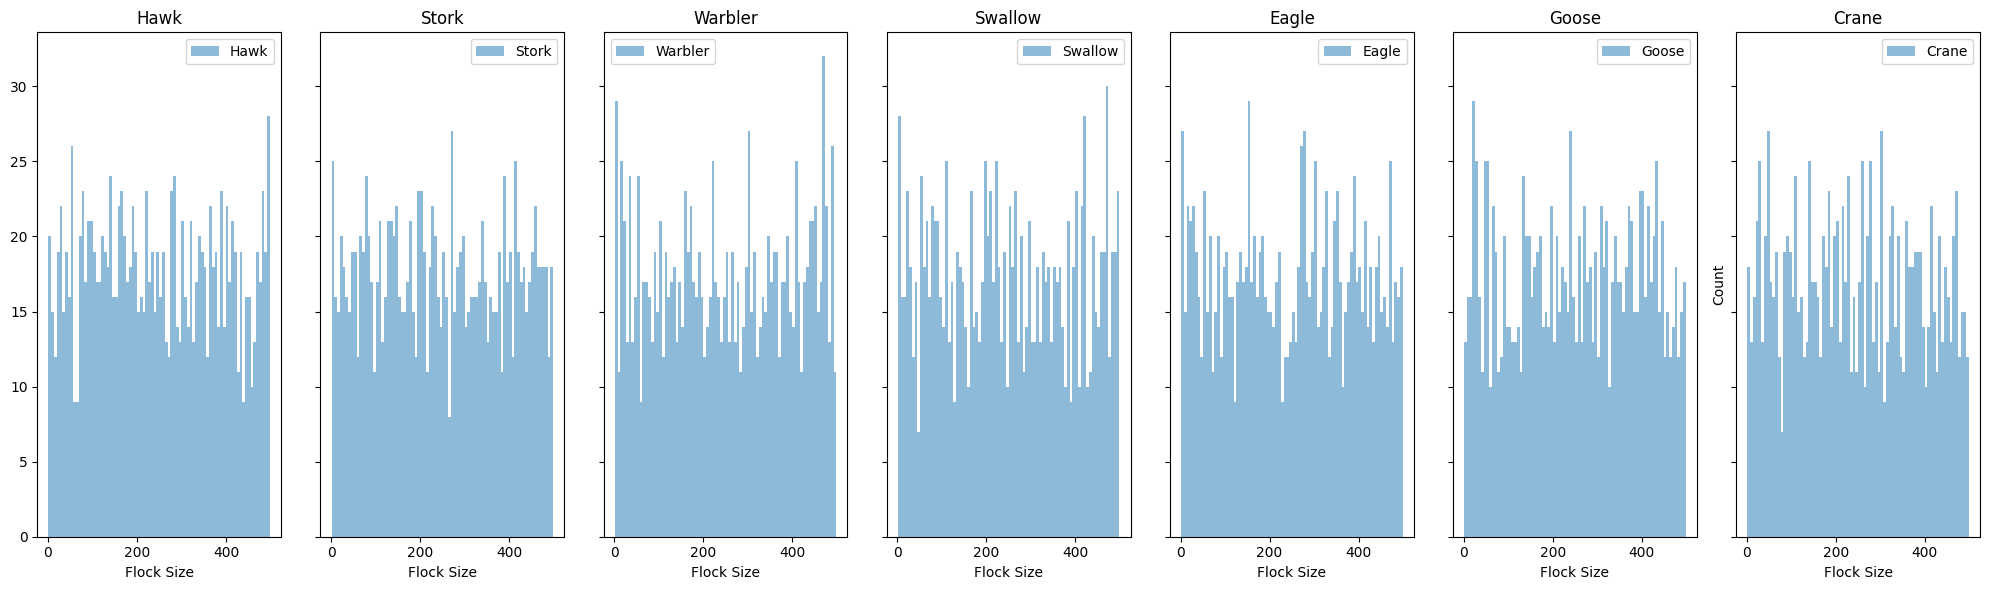

In [200]:
# Flock size of each species on histogram
Birds = [df_Hawk, df_Stork, df_warbler, df_Swallow, df_Eagle, df_Goose, df_Crane]
name = ['Hawk', 'Stork', 'Warbler', 'Swallow', 'Eagle', 'Goose', 'Crane']
fig, ax = plt.subplots(1, len(Birds), figsize=(20, 6), sharey=True)
for i, axis in enumerate(ax):
    axis.set_title(name[i])
    axis.set_xlabel('Flock Size')
    axis.hist(Birds[i]['Flock_Size'], bins=80, alpha=0.5, label=name[i])
    axis.legend()
axis.set_ylabel('Count')
plt.tight_layout()  
plt.show()

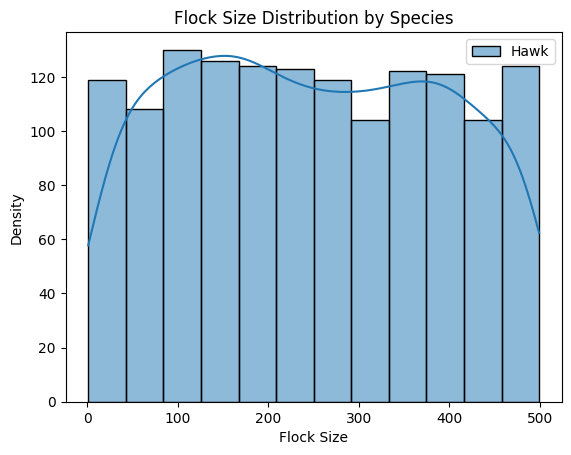

<Figure size 640x480 with 0 Axes>

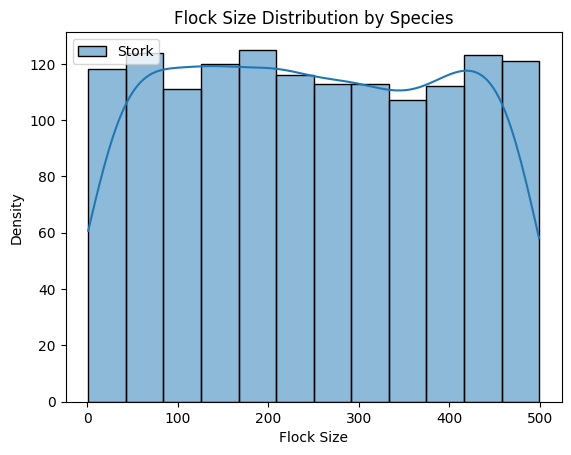

<Figure size 640x480 with 0 Axes>

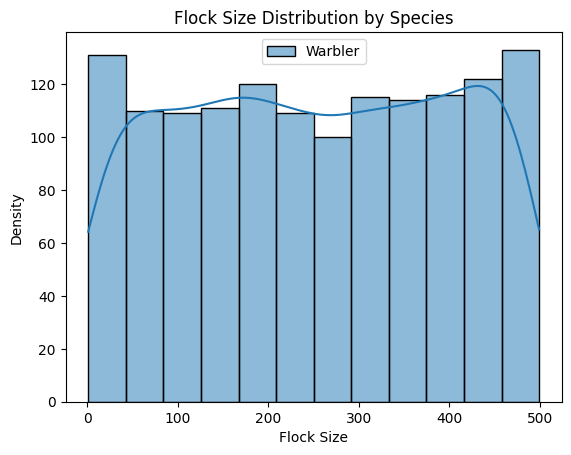

<Figure size 640x480 with 0 Axes>

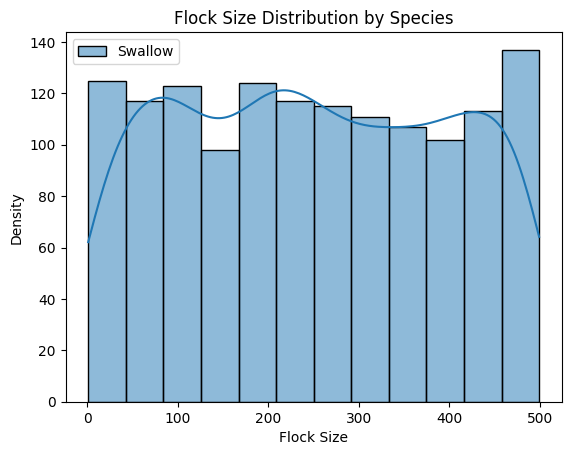

<Figure size 640x480 with 0 Axes>

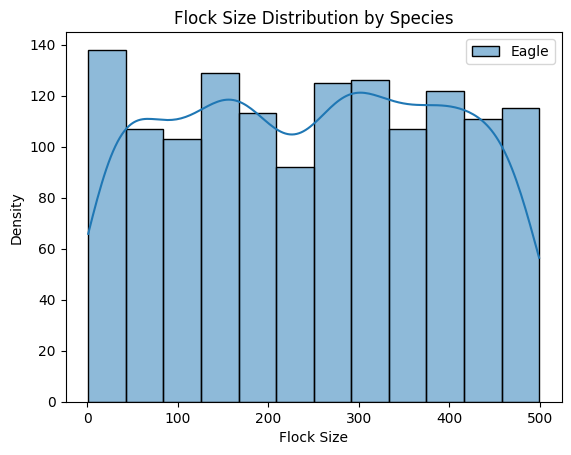

<Figure size 640x480 with 0 Axes>

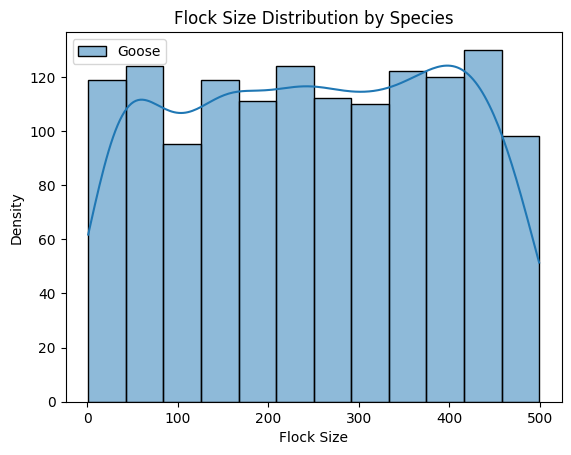

<Figure size 640x480 with 0 Axes>

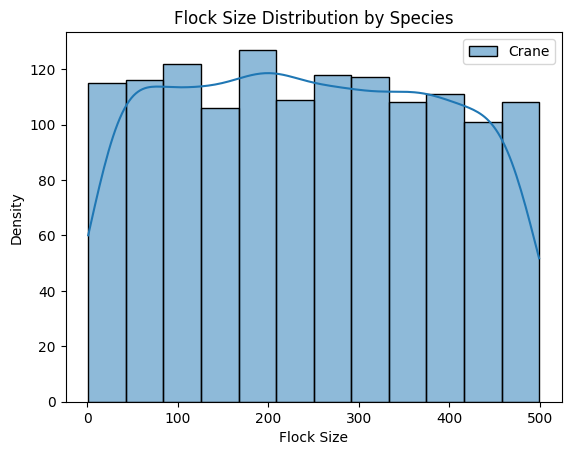

<Figure size 640x480 with 0 Axes>

In [201]:
Birds = [df_Hawk, df_Stork, df_warbler, df_Swallow, df_Eagle, df_Goose, df_Crane]
name = ['Hawk', 'Stork', 'Warbler', 'Swallow', 'Eagle', 'Goose', 'Crane']

for i, bird in enumerate(Birds):
    plt.subplots()
    sns.histplot(bird['Flock_Size'], kde = True, label=name[i])
    plt.legend()
    plt.title('Flock Size Distribution by Species')
    plt.xlabel('Flock Size')
    plt.ylabel('Density')
    plt.figure()
    plt.show()

In [202]:
# Specieswise migration success rate
Birds_migration_rate = pd.DataFrame(columns=['Species', 'Success Rate', 'Failed Rate'])
for i in range (len(Birds)):
    success_rate = Birds[i]['Migration_Success'].value_counts(normalize=True)[1]
    new_row = pd.DataFrame({'Species': [name[i]], 'Success Rate': [success_rate], "Failed Rate": [1 - success_rate]})
    Birds_migration_rate = pd.concat([Birds_migration_rate, new_row], ignore_index=True)
Birds_migration_rate

C:\Users\ratul\AppData\Local\Temp\ipykernel_10276\1662695272.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  success_rate = Birds[i]['Migration_Success'].value_counts(normalize=True)[1]
C:\Users\ratul\AppData\Local\Temp\ipykernel_10276\1662695272.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Birds_migration_rate = pd.concat([Birds_migration_rate, new_row], ignore_index=True)
C:\Users\ratul\AppData\Local\Temp\ipykernel_10276\1662695272.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer ke

,Species,Success Rate,Failed Rate
0,Hawk,0.496489,0.503511
1,Stork,0.491803,0.508197
2,Warbler,0.471223,0.528777
3,Swallow,0.475162,0.524838
4,Eagle,0.492795,0.507205
5,Goose,0.494220,0.505780
6,Crane,0.498527,0.501473


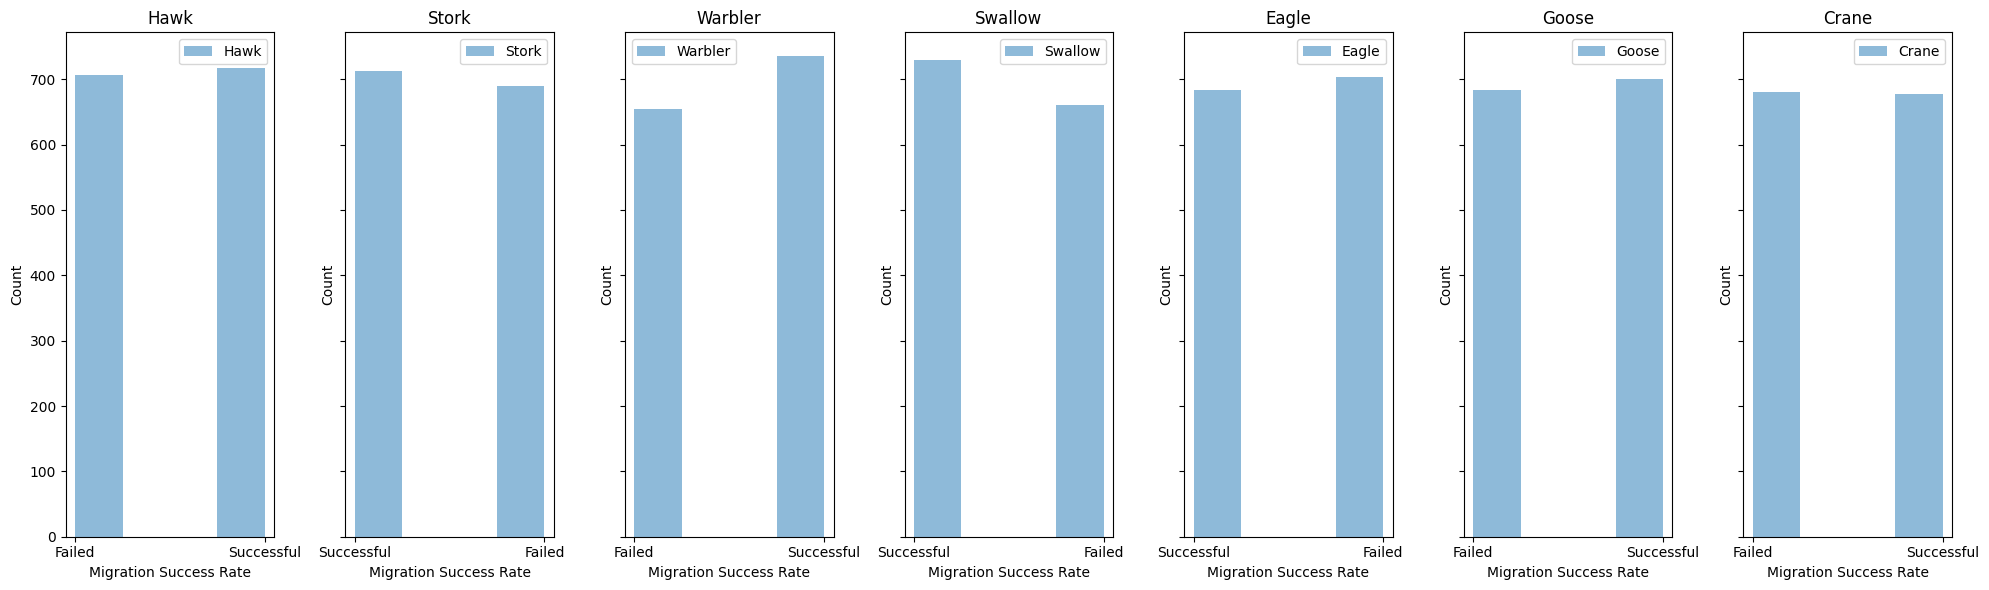

In [203]:
# Plotting Specieswise migration success and failure counts
Birds = [df_Hawk, df_Stork, df_warbler, df_Swallow, df_Eagle, df_Goose, df_Crane]
name = ['Hawk', 'Stork', 'Warbler', 'Swallow', 'Eagle', 'Goose', 'Crane']
fig, ax = plt.subplots(1, len(Birds), figsize=(20, 6), sharey=True)
for i, axis in enumerate(ax):
    axis.set_title(name[i])
    axis.set_xlabel('Migration Success Rate')
    axis.hist(Birds[i]['Migration_Success'], bins=4, alpha=0.5, label=name[i])
    axis.legend()
    axis.set_ylabel('Count')
plt.tight_layout()
plt.show()

In [204]:
df.columns

Index(['Species', 'Region', 'Habitat', 'Weather_Condition', 'Migration_Reason',
       'Start_Latitude', 'Start_Longitude', 'End_Latitude', 'End_Longitude',
       'Flight_Distance_km', 'Flight_Duration_hours', 'Average_Speed_kmph',
       'Max_Altitude_m', 'Min_Altitude_m', 'Temperature_C', 'Wind_Speed_kmph',
       'Humidity_%', 'Pressure_hPa', 'Visibility_km', 'Nesting_Success',
       'Tag_Battery_Level_%', 'Signal_Strength_dB', 'Migration_Start_Month',
       'Migration_End_Month', 'Rest_Stops', 'Predator_Sightings', 'Tag_Type',
       'Migrated_in_Flock', 'Flock_Size', 'Food_Supply_Level',
       'Tracking_Quality', 'Migration_Interrupted', 'Interrupted_Reason',
       'Tagged_By', 'Tag_Weight_g', 'Migration_Success',
       'Recovery_Location_Known', 'Recovery_Time_days', 'Observation_Counts',
       'Observation_Quality', 'Speed (kmph)'],
      dtype='object')

In [205]:
df[["Average_Speed_kmph", "Speed (kmph)"]]

,Average_Speed_kmph,Speed (kmph)
0,47.82,35.430101
1,48.41,70.781996
3,55.38,39.478365
4,53.92,54.084007
5,52.39,56.476749
...,...,...
9995,57.77,44.994084
9996,52.59,47.962810
9997,44.25,52.245675
9998,55.33,48.609124


In [206]:
df["Average_Speed_kmph"].describe() 

count    9736.000000
mean       49.946143
std         5.080750
min        30.430000
25%        46.530000
50%        50.030000
75%        53.352500
max        68.950000
Name: Average_Speed_kmph, dtype: float64

Weather impact on nesting success

In [207]:
# Use crosstab to count occurrences of Nesting Success for each Weather Condition
result = pd.crosstab(df['Weather_Condition'], df['Nesting_Success'])
result

Nesting_Success,No,Yes
Weather_Condition,,
Clear,922,949
Foggy,1059,1018
Rainy,971,904
Stormy,1008,947
Windy,954,1004


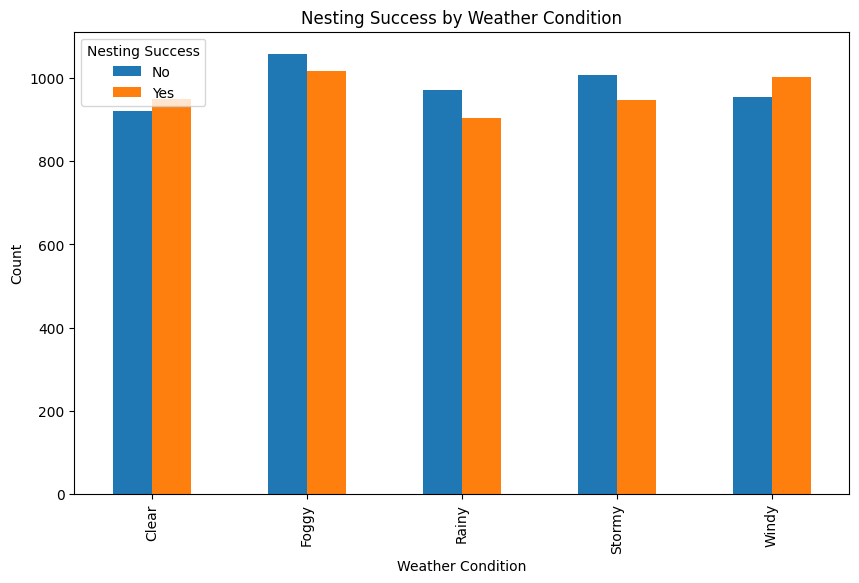

In [208]:
result.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Nesting Success by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.legend(title='Nesting Success')
plt.show()

In [209]:
df.columns 

Index(['Species', 'Region', 'Habitat', 'Weather_Condition', 'Migration_Reason',
       'Start_Latitude', 'Start_Longitude', 'End_Latitude', 'End_Longitude',
       'Flight_Distance_km', 'Flight_Duration_hours', 'Average_Speed_kmph',
       'Max_Altitude_m', 'Min_Altitude_m', 'Temperature_C', 'Wind_Speed_kmph',
       'Humidity_%', 'Pressure_hPa', 'Visibility_km', 'Nesting_Success',
       'Tag_Battery_Level_%', 'Signal_Strength_dB', 'Migration_Start_Month',
       'Migration_End_Month', 'Rest_Stops', 'Predator_Sightings', 'Tag_Type',
       'Migrated_in_Flock', 'Flock_Size', 'Food_Supply_Level',
       'Tracking_Quality', 'Migration_Interrupted', 'Interrupted_Reason',
       'Tagged_By', 'Tag_Weight_g', 'Migration_Success',
       'Recovery_Location_Known', 'Recovery_Time_days', 'Observation_Counts',
       'Observation_Quality', 'Speed (kmph)'],
      dtype='object')

In [210]:
# what conditons are interrupting migration
df['Migration_Interrupted'].value_counts()

Migration_Interrupted
Yes    4911
No     4825
Name: count, dtype: int64

In [211]:
df['Interrupted_Reason'].value_counts()

Interrupted_Reason
Storm          2007
Injury         1969
Predator       1948
Lost Signal    1885
Name: count, dtype: int64

In [212]:
crosstab_result = pd.crosstab(df['Migration_Interrupted'], df['Interrupted_Reason'])
crosstab_result

Interrupted_Reason,Injury,Lost Signal,Predator,Storm
Migration_Interrupted,,,,
No,985,956,967,967
Yes,984,929,981,1040


<Axes: xlabel='Migration_Interrupted'>

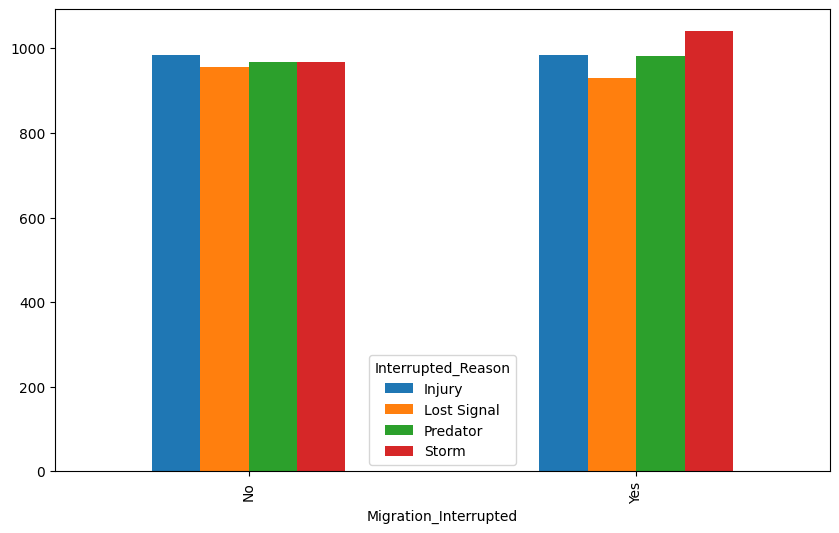

In [213]:
crosstab_result.plot(kind='bar', stacked=False, figsize=(10, 6))

In [214]:
crosstab_result_new = pd.crosstab(df['Interrupted_Reason'], df['Migration_Interrupted'])
crosstab_result_new

Migration_Interrupted,No,Yes
Interrupted_Reason,,
Injury,985,984
Lost Signal,956,929
Predator,967,981
Storm,967,1040


<Axes: xlabel='Interrupted_Reason'>

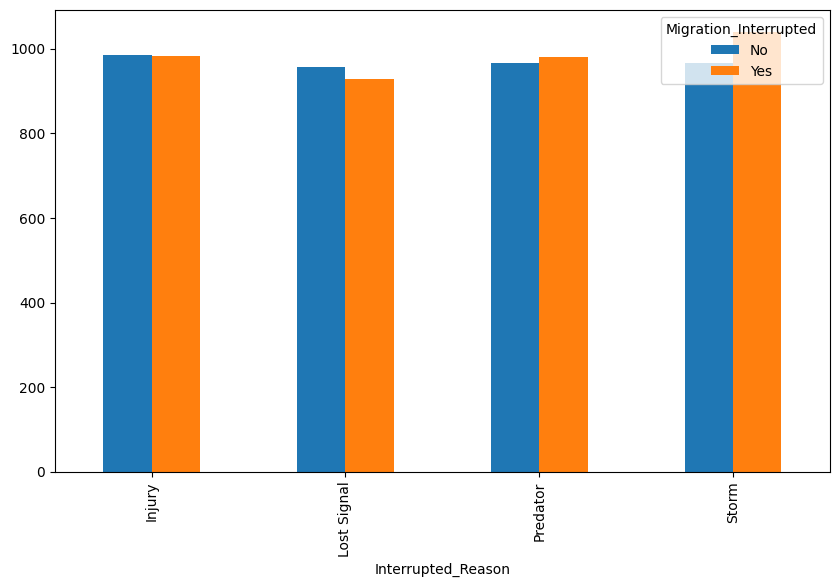

In [215]:
crosstab_result_new.plot(kind='bar', stacked=False, figsize=(10, 6))

In [216]:
# weather condition impact on migration
crosstab_weather = pd.crosstab(df['Weather_Condition'], df['Migration_Interrupted'])
crosstab_weather

Migration_Interrupted,No,Yes
Weather_Condition,,
Clear,927,944
Foggy,1029,1048
Rainy,937,938
Stormy,963,992
Windy,969,989


<Axes: xlabel='Weather_Condition'>

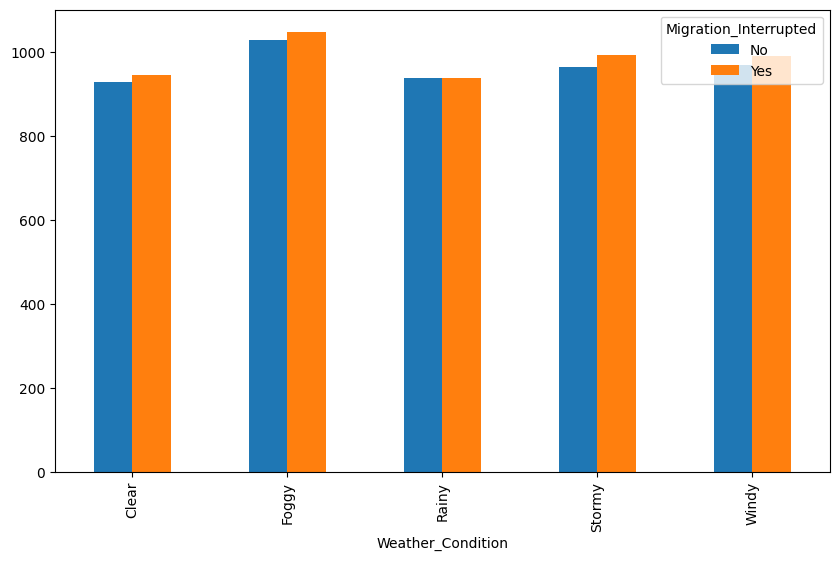

In [217]:
crosstab_weather.plot(kind='bar', stacked=False, figsize=(10, 6))

<Axes: xlabel='Weather_Condition'>

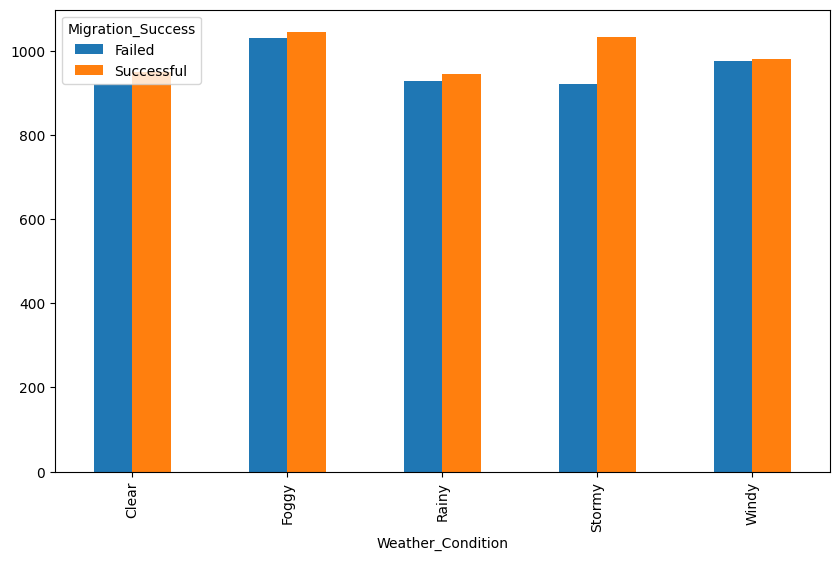

In [218]:
pd.crosstab(df['Weather_Condition'], df['Migration_Success']).plot(kind='bar', stacked=False, figsize=(10, 6))

<Axes: xlabel='Migration_Interrupted'>

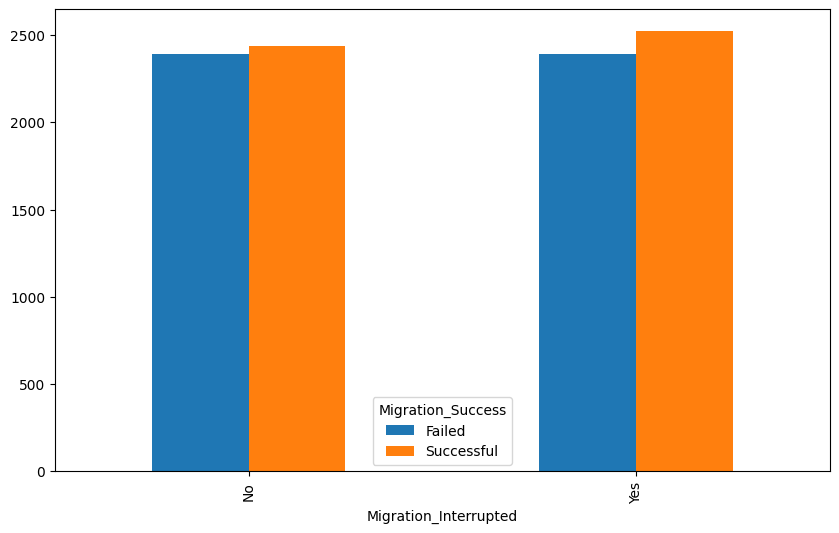

In [219]:
pd.crosstab(df['Migration_Interrupted'], df['Migration_Success']).plot(kind='bar', stacked=False, figsize=(10, 6))

In [220]:
# after being clear weather what interrupted migration
pd.crosstab(df['Weather_Condition'], df['Interrupted_Reason'])

Interrupted_Reason,Injury,Lost Signal,Predator,Storm
Weather_Condition,,,,
Clear,361,357,375,400
Foggy,420,397,430,436
Rainy,400,338,358,400
Stormy,401,387,407,364
Windy,387,406,378,407


In [221]:
df.groupby(df['Weather_Condition'] == 'Clear')['Interrupted_Reason'].value_counts()

Weather_Condition  Interrupted_Reason
False              Injury                1608
                   Storm                 1607
                   Predator              1573
                   Lost Signal           1528
True               Storm                  400
                   Predator               375
                   Injury                 361
                   Lost Signal            357
Name: count, dtype: int64

In [222]:
clear = df[df['Weather_Condition'] == 'Clear'].groupby('Interrupted_Reason').value_counts() 
clear

Interrupted_Reason  Species  Region         Habitat    Weather_Condition  Migration_Reason  Start_Latitude  Start_Longitude  End_Latitude  End_Longitude  Flight_Distance_km  Flight_Duration_hours  Average_Speed_kmph  Max_Altitude_m  Min_Altitude_m  Temperature_C  Wind_Speed_kmph  Humidity_%  Pressure_hPa  Visibility_km  Nesting_Success  Tag_Battery_Level_%  Signal_Strength_dB  Migration_Start_Month  Migration_End_Month  Rest_Stops  Predator_Sightings  Tag_Type   Migrated_in_Flock  Flock_Size  Food_Supply_Level  Tracking_Quality  Migration_Interrupted  Tagged_By     Tag_Weight_g  Migration_Success  Recovery_Location_Known  Recovery_Time_days  Observation_Counts  Observation_Quality  Speed (kmph)
Injury              Crane    Africa         Coastal    Clear              Breeding           65.346569      -117.669564       87.426476    -78.248321     2033.49             44.9                   49.84               2182            488             -3.2           57.2             82          104

In [223]:
foggy = df[df['Weather_Condition'] == 'Foggy'].groupby('Interrupted_Reason').value_counts() 
foggy

Interrupted_Reason  Species  Region         Habitat   Weather_Condition  Migration_Reason  Start_Latitude  Start_Longitude  End_Latitude  End_Longitude  Flight_Distance_km  Flight_Duration_hours  Average_Speed_kmph  Max_Altitude_m  Min_Altitude_m  Temperature_C  Wind_Speed_kmph  Humidity_%  Pressure_hPa  Visibility_km  Nesting_Success  Tag_Battery_Level_%  Signal_Strength_dB  Migration_Start_Month  Migration_End_Month  Rest_Stops  Predator_Sightings  Tag_Type   Migrated_in_Flock  Flock_Size  Food_Supply_Level  Tracking_Quality  Migration_Interrupted  Tagged_By     Tag_Weight_g  Migration_Success  Recovery_Location_Known  Recovery_Time_days  Observation_Counts  Observation_Quality  Speed (kmph)
Injury              Crane    Africa         Coastal   Foggy              Avoid Predators    33.787665      -0.010265         75.659698     35.475563     2214.15             28.3                   48.32               2091            616              12.7          29.0             58          1043.

In [224]:
rainy = df[df['Weather_Condition'] == 'Rainy'].groupby('Interrupted_Reason').value_counts()
rainy

Interrupted_Reason  Species  Region         Habitat  Weather_Condition  Migration_Reason  Start_Latitude  Start_Longitude  End_Latitude  End_Longitude  Flight_Distance_km  Flight_Duration_hours  Average_Speed_kmph  Max_Altitude_m  Min_Altitude_m  Temperature_C  Wind_Speed_kmph  Humidity_%  Pressure_hPa  Visibility_km  Nesting_Success  Tag_Battery_Level_%  Signal_Strength_dB  Migration_Start_Month  Migration_End_Month  Rest_Stops  Predator_Sightings  Tag_Type   Migrated_in_Flock  Flock_Size  Food_Supply_Level  Tracking_Quality  Migration_Interrupted  Tagged_By     Tag_Weight_g  Migration_Success  Recovery_Location_Known  Recovery_Time_days  Observation_Counts  Observation_Quality  Speed (kmph)
Injury              Crane    Africa         Coastal  Rainy              Breeding          -42.389084       149.051078       48.580339     156.391925    2854.61             52.8                   49.37               6941            797              31.8          40.1             69          1039.5 

In [225]:
stormy = df[df['Weather_Condition'] == 'Stormy'].groupby('Interrupted_Reason').value_counts() 
stormy

Interrupted_Reason  Species  Region         Habitat    Weather_Condition  Migration_Reason  Start_Latitude  Start_Longitude  End_Latitude  End_Longitude  Flight_Distance_km  Flight_Duration_hours  Average_Speed_kmph  Max_Altitude_m  Min_Altitude_m  Temperature_C  Wind_Speed_kmph  Humidity_%  Pressure_hPa  Visibility_km  Nesting_Success  Tag_Battery_Level_%  Signal_Strength_dB  Migration_Start_Month  Migration_End_Month  Rest_Stops  Predator_Sightings  Tag_Type   Migrated_in_Flock  Flock_Size  Food_Supply_Level  Tracking_Quality  Migration_Interrupted  Tagged_By     Tag_Weight_g  Migration_Success  Recovery_Location_Known  Recovery_Time_days  Observation_Counts  Observation_Quality  Speed (kmph)
Injury              Crane    Africa         Coastal    Stormy             Avoid Predators    13.888695      -62.635784        62.899958     160.894433    2586.06             47.3                   48.76               3912            262              11.1          48.6             71          968

In [226]:
windy = df[df['Weather_Condition'] == 'Windy'].groupby('Interrupted_Reason').value_counts()
windy

Interrupted_Reason  Species  Region         Habitat  Weather_Condition  Migration_Reason  Start_Latitude  Start_Longitude  End_Latitude  End_Longitude  Flight_Distance_km  Flight_Duration_hours  Average_Speed_kmph  Max_Altitude_m  Min_Altitude_m  Temperature_C  Wind_Speed_kmph  Humidity_%  Pressure_hPa  Visibility_km  Nesting_Success  Tag_Battery_Level_%  Signal_Strength_dB  Migration_Start_Month  Migration_End_Month  Rest_Stops  Predator_Sightings  Tag_Type   Migrated_in_Flock  Flock_Size  Food_Supply_Level  Tracking_Quality  Migration_Interrupted  Tagged_By     Tag_Weight_g  Migration_Success  Recovery_Location_Known  Recovery_Time_days  Observation_Counts  Observation_Quality  Speed (kmph)
Injury              Crane    Africa         Coastal  Windy              Avoid Predators   -76.808132       135.977226       53.483657    -131.963587    2243.53             48.2                   61.28               4734            337              0.2           28.4             54          967.0  

In [227]:
df.Region.unique()

array(['South America', 'North America', 'Europe', 'Africa', 'Asia',
       'Australia'], dtype=object)

In [228]:
df.Habitat.unique()

array(['Grassland', 'Urban', 'Coastal', 'Wetland', 'Forest', 'Mountain'],
      dtype=object)

In [229]:
# habitatwise species distribution
df['Habitat'].value_counts()

Habitat
Wetland      1649
Coastal      1643
Urban        1629
Forest       1621
Mountain     1603
Grassland    1591
Name: count, dtype: int64

In [230]:
df["Region"].value_counts()

Region
South America    1660
North America    1656
Asia             1641
Africa           1623
Australia        1591
Europe           1565
Name: count, dtype: int64

In [231]:
Habitat_crosstab = pd.crosstab(df['Species'], df['Habitat'])
Habitat_crosstab

Habitat,Coastal,Forest,Grassland,Mountain,Urban,Wetland
Species,,,,,,
Crane,228,231,249,229,200,221
Eagle,254,224,226,219,211,254
Goose,238,232,228,240,213,233
Hawk,224,237,237,223,257,246
Stork,227,255,223,230,243,225
Swallow,243,223,204,234,243,242
Warbler,229,219,224,228,262,228


<Axes: xlabel='Species'>

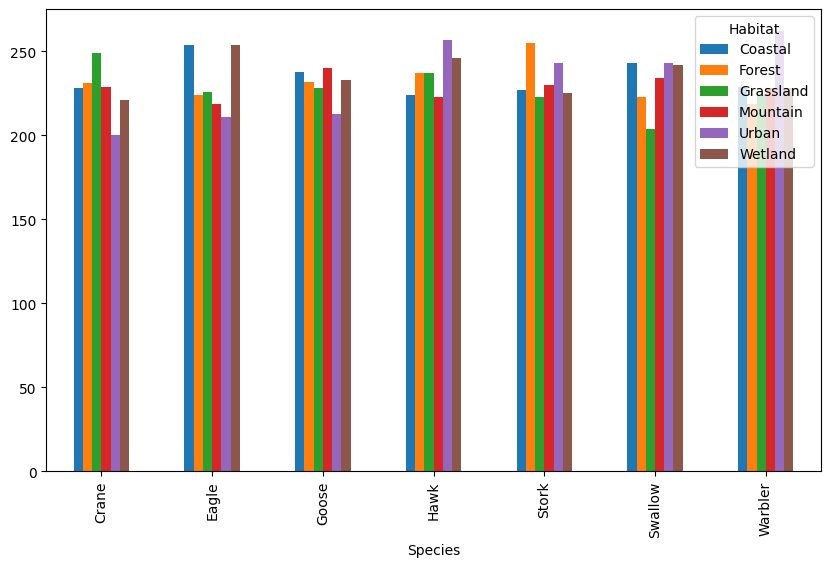

In [232]:
Habitat_crosstab.plot(kind='bar', stacked=False, figsize=(10, 6))

In [233]:
species_crosstab = pd.crosstab(df['Habitat'], df['Species'])
species_crosstab

Species,Crane,Eagle,Goose,Hawk,Stork,Swallow,Warbler
Habitat,,,,,,,
Coastal,228,254,238,224,227,243,229
Forest,231,224,232,237,255,223,219
Grassland,249,226,228,237,223,204,224
Mountain,229,219,240,223,230,234,228
Urban,200,211,213,257,243,243,262
Wetland,221,254,233,246,225,242,228


<Axes: xlabel='Habitat'>

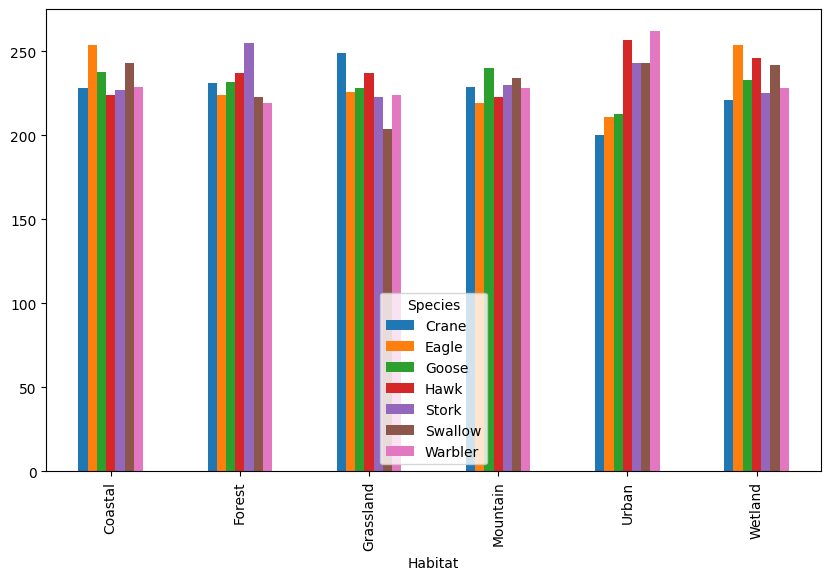

In [234]:
species_crosstab.plot(kind='bar', stacked=False, figsize=(10, 6))

In [235]:
df.columns

Index(['Species', 'Region', 'Habitat', 'Weather_Condition', 'Migration_Reason',
       'Start_Latitude', 'Start_Longitude', 'End_Latitude', 'End_Longitude',
       'Flight_Distance_km', 'Flight_Duration_hours', 'Average_Speed_kmph',
       'Max_Altitude_m', 'Min_Altitude_m', 'Temperature_C', 'Wind_Speed_kmph',
       'Humidity_%', 'Pressure_hPa', 'Visibility_km', 'Nesting_Success',
       'Tag_Battery_Level_%', 'Signal_Strength_dB', 'Migration_Start_Month',
       'Migration_End_Month', 'Rest_Stops', 'Predator_Sightings', 'Tag_Type',
       'Migrated_in_Flock', 'Flock_Size', 'Food_Supply_Level',
       'Tracking_Quality', 'Migration_Interrupted', 'Interrupted_Reason',
       'Tagged_By', 'Tag_Weight_g', 'Migration_Success',
       'Recovery_Location_Known', 'Recovery_Time_days', 'Observation_Counts',
       'Observation_Quality', 'Speed (kmph)'],
      dtype='object')

In [238]:
df

,Species,Region,Habitat,Weather_Condition,Migration_Reason,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Flight_Distance_km,...,Migration_Interrupted,Interrupted_Reason,Tagged_By,Tag_Weight_g,Migration_Success,Recovery_Location_Known,Recovery_Time_days,Observation_Counts,Observation_Quality,Speed (kmph)
0,Warbler,South America,Grassland,Stormy,Feeding,11.906566,-169.378251,30.377647,-21.366879,1753.79,...,Yes,Storm,Researcher_A,27.0,Failed,No,102,56,Low,35.430101
1,Stork,North America,Grassland,Stormy,Breeding,62.301546,-111.475069,39.921092,47.963436,3263.05,...,Yes,Injury,Researcher_C,14.2,Successful,Yes,118,61,Low,70.781996
3,Warbler,South America,Urban,Stormy,Climate Change,35.770590,153.104341,-49.003145,-157.868744,2317.38,...,Yes,Lost Signal,Researcher_C,24.4,Successful,No,15,68,Low,39.478365
4,Crane,Europe,Urban,Windy,Avoid Predators,-21.611614,106.674824,11.681051,-115.022863,3077.38,...,No,NaN,Researcher_B,25.8,Failed,Yes,73,67,Moderate,54.084007
5,Hawk,Europe,Grassland,Stormy,Climate Change,-15.871617,138.292231,18.594214,-175.116068,2987.62,...,No,Lost Signal,Researcher_B,18.5,Failed,No,37,63,Moderate,56.476749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Crane,Africa,Wetland,Windy,Climate Change,-80.397410,87.638661,74.628139,-1.283046,2357.69,...,Yes,Predator,Researcher_C,20.6,Successful,No,99,59,Low,44.994084
9996,Hawk,Europe,Forest,Windy,Avoid Predators,-47.192670,2.850794,20.149497,-77.025629,2901.75,...,Yes,Predator,Researcher_B,7.8,Failed,No,117,82,Moderate,47.962810
9997,Goose,Europe,Wetland,Stormy,Avoid Predators,32.392299,-32.037925,28.625721,-13.844319,3019.80,...,No,Lost Signal,Researcher_B,17.8,Failed,No,79,66,High,52.245675
9998,Crane,South America,Mountain,Stormy,Breeding,-41.145112,84.837740,74.612320,-74.675591,2663.78,...,Yes,Lost Signal,Researcher_C,5.5,Successful,No,29,18,High,48.609124


In [239]:
# reducing the number of columns in the dataset based on their correlation with the target variable
# and removing the columns that are not significantly correlated with the target variable.
# This can help to reduce the dimensionality of the dataset and improve the performance of the model.
# For example, if the target variable is 'Migration_Success', we can select only the columns that have a correlation coefficient greater than 0.1 or less than -0.1 with 'Migration_Success'.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Migration_Success'] = le.fit_transform(df['Migration_Success'])

correlation_with_target = df.corr(numeric_only=True).loc[:, 'Migration_Success']
correlation_with_target.abs().sort_values(ascending=False)

Migration_Success        1.000000
Rest_Stops               0.028253
Min_Altitude_m           0.019555
Tag_Battery_Level_%      0.018219
Start_Longitude          0.017115
Flight_Distance_km       0.015938
Max_Altitude_m           0.013714
Speed (kmph)             0.013063
End_Longitude            0.012273
Humidity_%               0.009439
Flight_Duration_hours    0.007145
Tag_Weight_g             0.006722
Predator_Sightings       0.005707
Observation_Counts       0.004380
Signal_Strength_dB       0.004271
Pressure_hPa             0.003479
Average_Speed_kmph       0.003347
Flock_Size               0.002446
Start_Latitude           0.000985
Visibility_km            0.000957
Temperature_C            0.000933
Wind_Speed_kmph          0.000845
End_Latitude             0.000505
Recovery_Time_days       0.000176
Name: Migration_Success, dtype: float64

In [240]:
objects = df.select_dtypes(include=['object']).columns
objects

Index(['Species', 'Region', 'Habitat', 'Weather_Condition', 'Migration_Reason',
       'Nesting_Success', 'Migration_Start_Month', 'Migration_End_Month',
       'Tag_Type', 'Migrated_in_Flock', 'Food_Supply_Level',
       'Tracking_Quality', 'Migration_Interrupted', 'Interrupted_Reason',
       'Tagged_By', 'Recovery_Location_Known', 'Observation_Quality'],
      dtype='object')

In [241]:
df = df.drop(columns = ["Tagged_By"])
df

,Species,Region,Habitat,Weather_Condition,Migration_Reason,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Flight_Distance_km,...,Tracking_Quality,Migration_Interrupted,Interrupted_Reason,Tag_Weight_g,Migration_Success,Recovery_Location_Known,Recovery_Time_days,Observation_Counts,Observation_Quality,Speed (kmph)
0,Warbler,South America,Grassland,Stormy,Feeding,11.906566,-169.378251,30.377647,-21.366879,1753.79,...,Excellent,Yes,Storm,27.0,0,No,102,56,Low,35.430101
1,Stork,North America,Grassland,Stormy,Breeding,62.301546,-111.475069,39.921092,47.963436,3263.05,...,Good,Yes,Injury,14.2,1,Yes,118,61,Low,70.781996
3,Warbler,South America,Urban,Stormy,Climate Change,35.770590,153.104341,-49.003145,-157.868744,2317.38,...,Good,Yes,Lost Signal,24.4,1,No,15,68,Low,39.478365
4,Crane,Europe,Urban,Windy,Avoid Predators,-21.611614,106.674824,11.681051,-115.022863,3077.38,...,Good,No,NaN,25.8,0,Yes,73,67,Moderate,54.084007
5,Hawk,Europe,Grassland,Stormy,Climate Change,-15.871617,138.292231,18.594214,-175.116068,2987.62,...,Good,No,Lost Signal,18.5,0,No,37,63,Moderate,56.476749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Crane,Africa,Wetland,Windy,Climate Change,-80.397410,87.638661,74.628139,-1.283046,2357.69,...,Good,Yes,Predator,20.6,1,No,99,59,Low,44.994084
9996,Hawk,Europe,Forest,Windy,Avoid Predators,-47.192670,2.850794,20.149497,-77.025629,2901.75,...,Poor,Yes,Predator,7.8,0,No,117,82,Moderate,47.962810
9997,Goose,Europe,Wetland,Stormy,Avoid Predators,32.392299,-32.037925,28.625721,-13.844319,3019.80,...,Excellent,No,Lost Signal,17.8,0,No,79,66,High,52.245675
9998,Crane,South America,Mountain,Stormy,Breeding,-41.145112,84.837740,74.612320,-74.675591,2663.78,...,Poor,Yes,Lost Signal,5.5,1,No,29,18,High,48.609124


In [242]:
df[['Migration_Start_Month', 'Migration_End_Month',  'Flight_Distance_km', 'Flight_Duration_hours', 'Average_Speed_kmph', 'Rest_Stops']]

,Migration_Start_Month,Migration_End_Month,Flight_Distance_km,Flight_Duration_hours,Average_Speed_kmph,Rest_Stops
0,Jan,Apr,1753.79,49.5,47.82,3
1,Apr,Dec,3263.05,46.1,48.41,2
3,Jan,Nov,2317.38,58.7,55.38,8
4,Oct,Oct,3077.38,56.9,53.92,11
5,Nov,May,2987.62,52.9,52.39,5
...,...,...,...,...,...,...
9995,Feb,Nov,2357.69,52.4,57.77,9
9996,Sep,Jun,2901.75,60.5,52.59,12
9997,Nov,Apr,3019.80,57.8,44.25,10
9998,Jan,May,2663.78,54.8,55.33,1


In [243]:
pd.crosstab(df['Migration_Start_Month'], df["Migration_End_Month"])

Migration_End_Month,Apr,Dec,Jun,Mar,May,Nov,Oct
Migration_Start_Month,,,,,,,
Apr,174,176,152,177,178,174,151
Feb,165,184,166,189,181,162,174
Jan,182,175,193,158,168,192,174
Mar,172,186,199,182,158,162,204
May,174,170,171,161,170,198,168
Nov,201,167,154,200,176,173,163
Oct,183,183,164,179,168,184,155
Sep,177,153,173,167,160,176,160


In [244]:
df.columns

Index(['Species', 'Region', 'Habitat', 'Weather_Condition', 'Migration_Reason',
       'Start_Latitude', 'Start_Longitude', 'End_Latitude', 'End_Longitude',
       'Flight_Distance_km', 'Flight_Duration_hours', 'Average_Speed_kmph',
       'Max_Altitude_m', 'Min_Altitude_m', 'Temperature_C', 'Wind_Speed_kmph',
       'Humidity_%', 'Pressure_hPa', 'Visibility_km', 'Nesting_Success',
       'Tag_Battery_Level_%', 'Signal_Strength_dB', 'Migration_Start_Month',
       'Migration_End_Month', 'Rest_Stops', 'Predator_Sightings', 'Tag_Type',
       'Migrated_in_Flock', 'Flock_Size', 'Food_Supply_Level',
       'Tracking_Quality', 'Migration_Interrupted', 'Interrupted_Reason',
       'Tag_Weight_g', 'Migration_Success', 'Recovery_Location_Known',
       'Recovery_Time_days', 'Observation_Counts', 'Observation_Quality',
       'Speed (kmph)'],
      dtype='object')

In [245]:
df = df.drop(columns = ["Tag_Weight_g"])
df

,Species,Region,Habitat,Weather_Condition,Migration_Reason,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Flight_Distance_km,...,Food_Supply_Level,Tracking_Quality,Migration_Interrupted,Interrupted_Reason,Migration_Success,Recovery_Location_Known,Recovery_Time_days,Observation_Counts,Observation_Quality,Speed (kmph)
0,Warbler,South America,Grassland,Stormy,Feeding,11.906566,-169.378251,30.377647,-21.366879,1753.79,...,Low,Excellent,Yes,Storm,0,No,102,56,Low,35.430101
1,Stork,North America,Grassland,Stormy,Breeding,62.301546,-111.475069,39.921092,47.963436,3263.05,...,High,Good,Yes,Injury,1,Yes,118,61,Low,70.781996
3,Warbler,South America,Urban,Stormy,Climate Change,35.770590,153.104341,-49.003145,-157.868744,2317.38,...,Medium,Good,Yes,Lost Signal,1,No,15,68,Low,39.478365
4,Crane,Europe,Urban,Windy,Avoid Predators,-21.611614,106.674824,11.681051,-115.022863,3077.38,...,Low,Good,No,NaN,0,Yes,73,67,Moderate,54.084007
5,Hawk,Europe,Grassland,Stormy,Climate Change,-15.871617,138.292231,18.594214,-175.116068,2987.62,...,High,Good,No,Lost Signal,0,No,37,63,Moderate,56.476749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Crane,Africa,Wetland,Windy,Climate Change,-80.397410,87.638661,74.628139,-1.283046,2357.69,...,High,Good,Yes,Predator,1,No,99,59,Low,44.994084
9996,Hawk,Europe,Forest,Windy,Avoid Predators,-47.192670,2.850794,20.149497,-77.025629,2901.75,...,Medium,Poor,Yes,Predator,0,No,117,82,Moderate,47.962810
9997,Goose,Europe,Wetland,Stormy,Avoid Predators,32.392299,-32.037925,28.625721,-13.844319,3019.80,...,Medium,Excellent,No,Lost Signal,0,No,79,66,High,52.245675
9998,Crane,South America,Mountain,Stormy,Breeding,-41.145112,84.837740,74.612320,-74.675591,2663.78,...,Medium,Poor,Yes,Lost Signal,1,No,29,18,High,48.609124


In [246]:
df['Displacement'] = ((df['End_Latitude'] - df['Start_Latitude'])**2 + (df['End_Longitude'] - df['Start_Longitude'])**2)**0.5

In [247]:
df

,Species,Region,Habitat,Weather_Condition,Migration_Reason,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Flight_Distance_km,...,Tracking_Quality,Migration_Interrupted,Interrupted_Reason,Migration_Success,Recovery_Location_Known,Recovery_Time_days,Observation_Counts,Observation_Quality,Speed (kmph),Displacement
0,Warbler,South America,Grassland,Stormy,Feeding,11.906566,-169.378251,30.377647,-21.366879,1753.79,...,Excellent,Yes,Storm,0,No,102,56,Low,35.430101,149.159468
1,Stork,North America,Grassland,Stormy,Breeding,62.301546,-111.475069,39.921092,47.963436,3263.05,...,Good,Yes,Injury,1,Yes,118,61,Low,70.781996,161.001621
3,Warbler,South America,Urban,Stormy,Climate Change,35.770590,153.104341,-49.003145,-157.868744,2317.38,...,Good,Yes,Lost Signal,1,No,15,68,Low,39.478365,322.321028
4,Crane,Europe,Urban,Windy,Avoid Predators,-21.611614,106.674824,11.681051,-115.022863,3077.38,...,Good,No,NaN,0,Yes,73,67,Moderate,54.084007,224.183555
5,Hawk,Europe,Grassland,Stormy,Climate Change,-15.871617,138.292231,18.594214,-175.116068,2987.62,...,Good,No,Lost Signal,0,No,37,63,Moderate,56.476749,315.297725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Crane,Africa,Wetland,Windy,Climate Change,-80.397410,87.638661,74.628139,-1.283046,2357.69,...,Good,Yes,Predator,1,No,99,59,Low,44.994084,178.717628
9996,Hawk,Europe,Forest,Windy,Avoid Predators,-47.192670,2.850794,20.149497,-77.025629,2901.75,...,Poor,Yes,Predator,0,No,117,82,Moderate,47.962810,104.475884
9997,Goose,Europe,Wetland,Stormy,Avoid Predators,32.392299,-32.037925,28.625721,-13.844319,3019.80,...,Excellent,No,Lost Signal,0,No,79,66,High,52.245675,18.579409
9998,Crane,South America,Mountain,Stormy,Breeding,-41.145112,84.837740,74.612320,-74.675591,2663.78,...,Poor,Yes,Lost Signal,1,No,29,18,High,48.609124,197.089538


In [248]:
df["Displacement"].describe()

count    9736.000000
mean      144.340339
std        77.817917
min         1.781920
25%        83.578634
50%       134.970770
75%       196.276826
max       380.087588
Name: Displacement, dtype: float64

<Axes: xlabel='Displacement', ylabel='Count'>

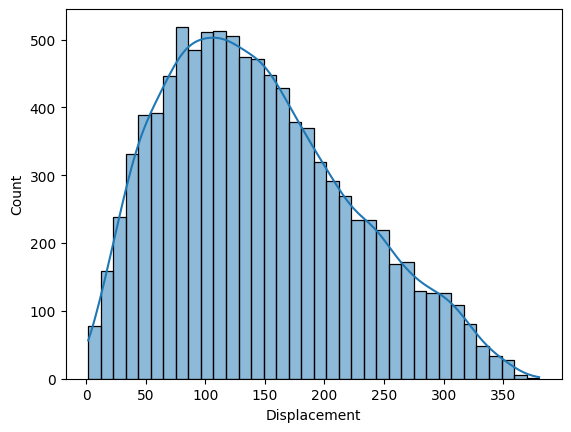

In [249]:
sns.histplot(df['Displacement'], kde = True)

<Axes: xlabel='Flight_Distance_km', ylabel='Count'>

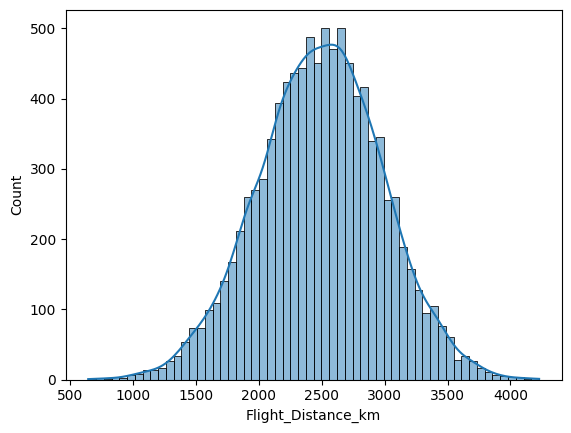

In [250]:
sns.histplot(df['Flight_Distance_km'], kde = True)

In [251]:
df["Flight_Distance_km"].describe()

count    9736.000000
mean     2490.147402
std       492.447095
min       643.330000
25%      2159.712500
50%      2498.785000
75%      2825.612500
max      4227.820000
Name: Flight_Distance_km, dtype: float64

In [252]:
Flight_Crosstab = pd.crosstab(df['Flight_Distance_km'], df['Migration_Success'])
Flight_Crosstab

Migration_Success,0,1
Flight_Distance_km,,
643.33,1,0
734.06,0,1
759.93,1,0
802.08,0,1
832.02,0,1
...,...,...
4091.55,1,0
4100.89,1,0
4135.51,1,0


In [253]:
df_migrated = df[df["Migration_Success"] == 1]
df_migrated

,Species,Region,Habitat,Weather_Condition,Migration_Reason,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Flight_Distance_km,...,Tracking_Quality,Migration_Interrupted,Interrupted_Reason,Migration_Success,Recovery_Location_Known,Recovery_Time_days,Observation_Counts,Observation_Quality,Speed (kmph),Displacement
1,Stork,North America,Grassland,Stormy,Breeding,62.301546,-111.475069,39.921092,47.963436,3263.05,...,Good,Yes,Injury,1,Yes,118,61,Low,70.781996,161.001621
3,Warbler,South America,Urban,Stormy,Climate Change,35.770590,153.104341,-49.003145,-157.868744,2317.38,...,Good,Yes,Lost Signal,1,No,15,68,Low,39.478365,322.321028
6,Hawk,Africa,Urban,Stormy,Feeding,-26.697200,-21.427507,-37.285769,-141.061378,2158.76,...,Fair,No,Predator,1,Yes,91,17,Low,38.412100,120.101544
9,Crane,North America,Urban,Stormy,Breeding,57.504161,-36.015543,-32.172102,-70.414015,2167.50,...,Fair,No,Predator,1,Yes,47,24,Low,40.819209,96.047316
10,Warbler,Asia,Wetland,Clear,Feeding,-15.013240,178.006265,-25.481816,-18.244294,2522.04,...,Fair,No,Lost Signal,1,Yes,91,43,High,67.075532,196.529573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,Swallow,North America,Urban,Foggy,Breeding,-18.205933,-23.701179,28.893351,175.283162,1679.12,...,Excellent,No,Lost Signal,1,Yes,18,41,Low,37.733034,204.482543
9991,Crane,Europe,Mountain,Windy,Breeding,-79.506796,37.807209,-36.840537,-6.877304,2501.63,...,Fair,No,Injury,1,No,84,76,Moderate,71.069034,61.782808
9994,Hawk,Africa,Forest,Rainy,Climate Change,33.231425,174.604258,-46.028971,85.565769,2136.97,...,Good,No,Storm,1,No,76,49,Low,35.975926,119.205968
9995,Crane,Africa,Wetland,Windy,Climate Change,-80.397410,87.638661,74.628139,-1.283046,2357.69,...,Good,Yes,Predator,1,No,99,59,Low,44.994084,178.717628


In [254]:
df_migrated["Flight_Distance_km"].describe()

count    4955.000000
mean     2482.438012
std       496.541260
min       734.060000
25%      2140.755000
50%      2497.730000
75%      2825.585000
max      4037.340000
Name: Flight_Distance_km, dtype: float64

In [255]:
df_migrated = df[df["Migration_Success"] == 0]
df_migrated.describe()

,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Flight_Distance_km,Flight_Duration_hours,Average_Speed_kmph,Max_Altitude_m,Min_Altitude_m,Temperature_C,...,Tag_Battery_Level_%,Signal_Strength_dB,Rest_Stops,Predator_Sightings,Flock_Size,Migration_Success,Recovery_Time_days,Observation_Counts,Speed (kmph),Displacement
count,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,...,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.0,4781.000000,4781.000000,4781.000000,4781.000000
mean,-0.289028,-2.394215,0.189150,-1.045597,2498.137369,50.469044,49.963455,5540.746287,495.587743,12.537942,...,54.125288,-69.906777,7.495503,4.514118,248.745660,0.0,60.523949,50.004392,51.180097,144.583257
std,51.633127,104.948810,51.731858,103.452919,488.091116,9.423449,5.097770,2591.032243,229.435646,13.079769,...,26.018218,9.799889,4.039376,2.886714,144.778618,0.0,34.132643,28.633731,13.475134,78.383448
min,-89.999003,-179.993975,-89.941818,-179.750096,643.330000,21.300000,30.770000,1000.000000,100.000000,-10.000000,...,10.000000,-104.300000,1.000000,0.000000,1.000000,0.0,1.000000,1.000000,12.519440,1.781920
25%,-44.762517,-94.581609,-44.013756,-90.515241,2184.130000,43.900000,46.520000,3349.000000,297.000000,1.100000,...,31.000000,-76.500000,4.000000,2.000000,123.000000,0.0,31.000000,25.000000,41.518868,82.634830
50%,-0.748130,-2.333191,0.904824,0.418015,2499.680000,50.400000,50.060000,5586.000000,494.000000,12.600000,...,54.000000,-69.800000,7.000000,5.000000,249.000000,0.0,61.000000,50.000000,50.046300,135.008196
75%,43.869915,89.316705,44.655694,89.578146,2825.620000,56.900000,53.370000,7766.000000,691.000000,23.900000,...,76.000000,-63.500000,11.000000,7.000000,376.000000,0.0,90.000000,75.000000,59.351429,197.742775
max,89.863304,179.989973,89.944178,179.955036,4227.820000,89.200000,68.950000,9999.000000,899.000000,35.000000,...,99.000000,-33.300000,14.000000,9.000000,499.000000,0.0,119.000000,99.000000,89.532219,363.872409


In [256]:
not_migrated_loc = df_migrated[["Flight_Distance_km", "Start_Latitude", "End_Latitude", "Start_Longitude", "End_Longitude"]]
not_migrated_loc

,Flight_Distance_km,Start_Latitude,End_Latitude,Start_Longitude,End_Longitude
0,1753.79,11.906566,30.377647,-169.378251,-21.366879
4,3077.38,-21.611614,11.681051,106.674824,-115.022863
5,2987.62,-15.871617,18.594214,138.292231,-175.116068
7,2595.28,18.650358,87.830931,116.122353,82.745878
8,2446.57,43.093039,51.396825,127.257686,-178.303982
...,...,...,...,...,...
9992,2623.61,-26.838531,44.210197,169.128178,18.232111
9993,2167.40,41.355520,69.264254,85.723203,-173.361266
9996,2901.75,-47.192670,20.149497,2.850794,-77.025629
9997,3019.80,32.392299,28.625721,-32.037925,-13.844319


In [257]:
not_migrated_loc.describe()

,Flight_Distance_km,Start_Latitude,End_Latitude,Start_Longitude,End_Longitude
count,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000
mean,2498.137369,-0.289028,0.189150,-2.394215,-1.045597
std,488.091116,51.633127,51.731858,104.948810,103.452919
min,643.330000,-89.999003,-89.941818,-179.993975,-179.750096
25%,2184.130000,-44.762517,-44.013756,-94.581609,-90.515241
50%,2499.680000,-0.748130,0.904824,-2.333191,0.418015
75%,2825.620000,43.869915,44.655694,89.316705,89.578146
max,4227.820000,89.863304,89.944178,179.989973,179.955036


In [258]:
df

,Species,Region,Habitat,Weather_Condition,Migration_Reason,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Flight_Distance_km,...,Tracking_Quality,Migration_Interrupted,Interrupted_Reason,Migration_Success,Recovery_Location_Known,Recovery_Time_days,Observation_Counts,Observation_Quality,Speed (kmph),Displacement
0,Warbler,South America,Grassland,Stormy,Feeding,11.906566,-169.378251,30.377647,-21.366879,1753.79,...,Excellent,Yes,Storm,0,No,102,56,Low,35.430101,149.159468
1,Stork,North America,Grassland,Stormy,Breeding,62.301546,-111.475069,39.921092,47.963436,3263.05,...,Good,Yes,Injury,1,Yes,118,61,Low,70.781996,161.001621
3,Warbler,South America,Urban,Stormy,Climate Change,35.770590,153.104341,-49.003145,-157.868744,2317.38,...,Good,Yes,Lost Signal,1,No,15,68,Low,39.478365,322.321028
4,Crane,Europe,Urban,Windy,Avoid Predators,-21.611614,106.674824,11.681051,-115.022863,3077.38,...,Good,No,NaN,0,Yes,73,67,Moderate,54.084007,224.183555
5,Hawk,Europe,Grassland,Stormy,Climate Change,-15.871617,138.292231,18.594214,-175.116068,2987.62,...,Good,No,Lost Signal,0,No,37,63,Moderate,56.476749,315.297725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Crane,Africa,Wetland,Windy,Climate Change,-80.397410,87.638661,74.628139,-1.283046,2357.69,...,Good,Yes,Predator,1,No,99,59,Low,44.994084,178.717628
9996,Hawk,Europe,Forest,Windy,Avoid Predators,-47.192670,2.850794,20.149497,-77.025629,2901.75,...,Poor,Yes,Predator,0,No,117,82,Moderate,47.962810,104.475884
9997,Goose,Europe,Wetland,Stormy,Avoid Predators,32.392299,-32.037925,28.625721,-13.844319,3019.80,...,Excellent,No,Lost Signal,0,No,79,66,High,52.245675,18.579409
9998,Crane,South America,Mountain,Stormy,Breeding,-41.145112,84.837740,74.612320,-74.675591,2663.78,...,Poor,Yes,Lost Signal,1,No,29,18,High,48.609124,197.089538


In [259]:
if df['Flight_Distance_km'].any() > 2500: 
    df['Migration_success'] = df['Migration_success'].apply(lambda x: 1 if x else 0)

In [260]:
df.Migration_Success.value_counts()

Migration_Success
1    4955
0    4781
Name: count, dtype: int64

In [261]:
df.columns 

Index(['Species', 'Region', 'Habitat', 'Weather_Condition', 'Migration_Reason',
       'Start_Latitude', 'Start_Longitude', 'End_Latitude', 'End_Longitude',
       'Flight_Distance_km', 'Flight_Duration_hours', 'Average_Speed_kmph',
       'Max_Altitude_m', 'Min_Altitude_m', 'Temperature_C', 'Wind_Speed_kmph',
       'Humidity_%', 'Pressure_hPa', 'Visibility_km', 'Nesting_Success',
       'Tag_Battery_Level_%', 'Signal_Strength_dB', 'Migration_Start_Month',
       'Migration_End_Month', 'Rest_Stops', 'Predator_Sightings', 'Tag_Type',
       'Migrated_in_Flock', 'Flock_Size', 'Food_Supply_Level',
       'Tracking_Quality', 'Migration_Interrupted', 'Interrupted_Reason',
       'Migration_Success', 'Recovery_Location_Known', 'Recovery_Time_days',
       'Observation_Counts', 'Observation_Quality', 'Speed (kmph)',
       'Displacement'],
      dtype='object')

In [262]:
df = df.drop(columns = ["Recovery_Location_Known", "Recovery_Time_days",  'Displacement'])
df

,Species,Region,Habitat,Weather_Condition,Migration_Reason,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Flight_Distance_km,...,Migrated_in_Flock,Flock_Size,Food_Supply_Level,Tracking_Quality,Migration_Interrupted,Interrupted_Reason,Migration_Success,Observation_Counts,Observation_Quality,Speed (kmph)
0,Warbler,South America,Grassland,Stormy,Feeding,11.906566,-169.378251,30.377647,-21.366879,1753.79,...,Yes,264,Low,Excellent,Yes,Storm,0,56,Low,35.430101
1,Stork,North America,Grassland,Stormy,Breeding,62.301546,-111.475069,39.921092,47.963436,3263.05,...,Yes,212,High,Good,Yes,Injury,1,61,Low,70.781996
3,Warbler,South America,Urban,Stormy,Climate Change,35.770590,153.104341,-49.003145,-157.868744,2317.38,...,No,484,Medium,Good,Yes,Lost Signal,1,68,Low,39.478365
4,Crane,Europe,Urban,Windy,Avoid Predators,-21.611614,106.674824,11.681051,-115.022863,3077.38,...,No,184,Low,Good,No,NaN,0,67,Moderate,54.084007
5,Hawk,Europe,Grassland,Stormy,Climate Change,-15.871617,138.292231,18.594214,-175.116068,2987.62,...,Yes,451,High,Good,No,Lost Signal,0,63,Moderate,56.476749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Crane,Africa,Wetland,Windy,Climate Change,-80.397410,87.638661,74.628139,-1.283046,2357.69,...,No,172,High,Good,Yes,Predator,1,59,Low,44.994084
9996,Hawk,Europe,Forest,Windy,Avoid Predators,-47.192670,2.850794,20.149497,-77.025629,2901.75,...,No,496,Medium,Poor,Yes,Predator,0,82,Moderate,47.962810
9997,Goose,Europe,Wetland,Stormy,Avoid Predators,32.392299,-32.037925,28.625721,-13.844319,3019.80,...,No,375,Medium,Excellent,No,Lost Signal,0,66,High,52.245675
9998,Crane,South America,Mountain,Stormy,Breeding,-41.145112,84.837740,74.612320,-74.675591,2663.78,...,Yes,227,Medium,Poor,Yes,Lost Signal,1,18,High,48.609124


In [263]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Migration_Success'] = le.fit_transform(df['Migration_Success'])

correlation_with_target = df.corr(numeric_only=True).loc[:, 'Migration_Success']
correlation_with_target.sort_values(ascending=False)

Migration_Success        1.000000
Min_Altitude_m           0.019555
Tag_Battery_Level_%      0.018219
Start_Longitude          0.017115
End_Longitude            0.012273
Humidity_%               0.009439
Flight_Duration_hours    0.007145
Signal_Strength_dB       0.004271
Visibility_km            0.000957
Temperature_C            0.000933
Wind_Speed_kmph          0.000845
End_Latitude            -0.000505
Start_Latitude          -0.000985
Flock_Size              -0.002446
Average_Speed_kmph      -0.003347
Pressure_hPa            -0.003479
Observation_Counts      -0.004380
Predator_Sightings      -0.005707
Speed (kmph)            -0.013063
Max_Altitude_m          -0.013714
Flight_Distance_km      -0.015938
Rest_Stops              -0.028253
Name: Migration_Success, dtype: float64

In [264]:
df = df.drop(columns = ["Visibility_km", "Temperature_C", "Wind_Speed_kmph", "End_Latitude", "Start_Latitude"])
df

,Species,Region,Habitat,Weather_Condition,Migration_Reason,Start_Longitude,End_Longitude,Flight_Distance_km,Flight_Duration_hours,Average_Speed_kmph,...,Migrated_in_Flock,Flock_Size,Food_Supply_Level,Tracking_Quality,Migration_Interrupted,Interrupted_Reason,Migration_Success,Observation_Counts,Observation_Quality,Speed (kmph)
0,Warbler,South America,Grassland,Stormy,Feeding,-169.378251,-21.366879,1753.79,49.5,47.82,...,Yes,264,Low,Excellent,Yes,Storm,0,56,Low,35.430101
1,Stork,North America,Grassland,Stormy,Breeding,-111.475069,47.963436,3263.05,46.1,48.41,...,Yes,212,High,Good,Yes,Injury,1,61,Low,70.781996
3,Warbler,South America,Urban,Stormy,Climate Change,153.104341,-157.868744,2317.38,58.7,55.38,...,No,484,Medium,Good,Yes,Lost Signal,1,68,Low,39.478365
4,Crane,Europe,Urban,Windy,Avoid Predators,106.674824,-115.022863,3077.38,56.9,53.92,...,No,184,Low,Good,No,NaN,0,67,Moderate,54.084007
5,Hawk,Europe,Grassland,Stormy,Climate Change,138.292231,-175.116068,2987.62,52.9,52.39,...,Yes,451,High,Good,No,Lost Signal,0,63,Moderate,56.476749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Crane,Africa,Wetland,Windy,Climate Change,87.638661,-1.283046,2357.69,52.4,57.77,...,No,172,High,Good,Yes,Predator,1,59,Low,44.994084
9996,Hawk,Europe,Forest,Windy,Avoid Predators,2.850794,-77.025629,2901.75,60.5,52.59,...,No,496,Medium,Poor,Yes,Predator,0,82,Moderate,47.962810
9997,Goose,Europe,Wetland,Stormy,Avoid Predators,-32.037925,-13.844319,3019.80,57.8,44.25,...,No,375,Medium,Excellent,No,Lost Signal,0,66,High,52.245675
9998,Crane,South America,Mountain,Stormy,Breeding,84.837740,-74.675591,2663.78,54.8,55.33,...,Yes,227,Medium,Poor,Yes,Lost Signal,1,18,High,48.609124


In [265]:
df.drop(columns = ["Tracking_Quality"], inplace=True)
df

,Species,Region,Habitat,Weather_Condition,Migration_Reason,Start_Longitude,End_Longitude,Flight_Distance_km,Flight_Duration_hours,Average_Speed_kmph,...,Tag_Type,Migrated_in_Flock,Flock_Size,Food_Supply_Level,Migration_Interrupted,Interrupted_Reason,Migration_Success,Observation_Counts,Observation_Quality,Speed (kmph)
0,Warbler,South America,Grassland,Stormy,Feeding,-169.378251,-21.366879,1753.79,49.5,47.82,...,Radio,Yes,264,Low,Yes,Storm,0,56,Low,35.430101
1,Stork,North America,Grassland,Stormy,Breeding,-111.475069,47.963436,3263.05,46.1,48.41,...,Radio,Yes,212,High,Yes,Injury,1,61,Low,70.781996
3,Warbler,South America,Urban,Stormy,Climate Change,153.104341,-157.868744,2317.38,58.7,55.38,...,GPS,No,484,Medium,Yes,Lost Signal,1,68,Low,39.478365
4,Crane,Europe,Urban,Windy,Avoid Predators,106.674824,-115.022863,3077.38,56.9,53.92,...,GPS,No,184,Low,No,NaN,0,67,Moderate,54.084007
5,Hawk,Europe,Grassland,Stormy,Climate Change,138.292231,-175.116068,2987.62,52.9,52.39,...,GPS,Yes,451,High,No,Lost Signal,0,63,Moderate,56.476749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Crane,Africa,Wetland,Windy,Climate Change,87.638661,-1.283046,2357.69,52.4,57.77,...,Radio,No,172,High,Yes,Predator,1,59,Low,44.994084
9996,Hawk,Europe,Forest,Windy,Avoid Predators,2.850794,-77.025629,2901.75,60.5,52.59,...,Satellite,No,496,Medium,Yes,Predator,0,82,Moderate,47.962810
9997,Goose,Europe,Wetland,Stormy,Avoid Predators,-32.037925,-13.844319,3019.80,57.8,44.25,...,Satellite,No,375,Medium,No,Lost Signal,0,66,High,52.245675
9998,Crane,South America,Mountain,Stormy,Breeding,84.837740,-74.675591,2663.78,54.8,55.33,...,Satellite,Yes,227,Medium,Yes,Lost Signal,1,18,High,48.609124


In [266]:
objects = df.select_dtypes(include=['object']).columns
objects

Index(['Species', 'Region', 'Habitat', 'Weather_Condition', 'Migration_Reason',
       'Nesting_Success', 'Migration_Start_Month', 'Migration_End_Month',
       'Tag_Type', 'Migrated_in_Flock', 'Food_Supply_Level',
       'Migration_Interrupted', 'Interrupted_Reason', 'Observation_Quality'],
      dtype='object')

In [267]:
pd.crosstab(df['Migrated_in_Flock'], df["Flock_Size"])

Flock_Size,1,2,3,4,5,6,7,8,9,10,...,490,491,492,493,494,495,496,497,498,499
Migrated_in_Flock,,,,,,,,,,,,,,,,,,,,,
No,4,12,11,16,10,17,15,6,15,4,...,8,11,10,7,7,9,8,9,12,16
Yes,11,9,13,8,10,11,13,10,11,5,...,9,7,10,7,5,10,10,11,7,9


In [268]:
if df['Flock_Size'].any() > 10: 
    df['Migrated_in_Flock'] = df['Migrated_in_Flock'].apply(lambda x: "Yes" if x else "No")
df['Migrated_in_Flock'].value_counts()

Migrated_in_Flock
Yes    4982
No     4754
Name: count, dtype: int64

In [269]:
# Now x and y are ready for model training
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

encode_columns = ['Species', 'Region', 'Habitat', 'Weather_Condition', 'Migration_Reason',
       'Nesting_Success', 'Migration_Start_Month', 'Migration_End_Month',
       'Tag_Type', 'Migrated_in_Flock', 'Food_Supply_Level',
       'Migration_Interrupted', 'Interrupted_Reason', 'Observation_Quality']
df[encode_columns] = df[encode_columns].apply(le.fit_transform)
df

,Species,Region,Habitat,Weather_Condition,Migration_Reason,Start_Longitude,End_Longitude,Flight_Distance_km,Flight_Duration_hours,Average_Speed_kmph,...,Tag_Type,Migrated_in_Flock,Flock_Size,Food_Supply_Level,Migration_Interrupted,Interrupted_Reason,Migration_Success,Observation_Counts,Observation_Quality,Speed (kmph)
0,6,5,2,3,3,-169.378251,-21.366879,1753.79,49.5,47.82,...,1,1,264,1,1,3,0,56,1,35.430101
1,4,4,2,3,1,-111.475069,47.963436,3263.05,46.1,48.41,...,1,1,212,0,1,0,1,61,1,70.781996
3,6,5,4,3,2,153.104341,-157.868744,2317.38,58.7,55.38,...,0,0,484,2,1,1,1,68,1,39.478365
4,0,3,4,4,0,106.674824,-115.022863,3077.38,56.9,53.92,...,0,0,184,1,0,4,0,67,2,54.084007
5,3,3,2,3,2,138.292231,-175.116068,2987.62,52.9,52.39,...,0,1,451,0,0,1,0,63,2,56.476749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,5,4,2,87.638661,-1.283046,2357.69,52.4,57.77,...,1,0,172,0,1,2,1,59,1,44.994084
9996,3,3,1,4,0,2.850794,-77.025629,2901.75,60.5,52.59,...,2,0,496,2,1,2,0,82,2,47.962810
9997,2,3,5,3,0,-32.037925,-13.844319,3019.80,57.8,44.25,...,2,0,375,2,0,1,0,66,0,52.245675
9998,0,5,3,3,1,84.837740,-74.675591,2663.78,54.8,55.33,...,2,1,227,2,1,1,1,18,0,48.609124


In [270]:
df

,Species,Region,Habitat,Weather_Condition,Migration_Reason,Start_Longitude,End_Longitude,Flight_Distance_km,Flight_Duration_hours,Average_Speed_kmph,...,Tag_Type,Migrated_in_Flock,Flock_Size,Food_Supply_Level,Migration_Interrupted,Interrupted_Reason,Migration_Success,Observation_Counts,Observation_Quality,Speed (kmph)
0,6,5,2,3,3,-169.378251,-21.366879,1753.79,49.5,47.82,...,1,1,264,1,1,3,0,56,1,35.430101
1,4,4,2,3,1,-111.475069,47.963436,3263.05,46.1,48.41,...,1,1,212,0,1,0,1,61,1,70.781996
3,6,5,4,3,2,153.104341,-157.868744,2317.38,58.7,55.38,...,0,0,484,2,1,1,1,68,1,39.478365
4,0,3,4,4,0,106.674824,-115.022863,3077.38,56.9,53.92,...,0,0,184,1,0,4,0,67,2,54.084007
5,3,3,2,3,2,138.292231,-175.116068,2987.62,52.9,52.39,...,0,1,451,0,0,1,0,63,2,56.476749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,5,4,2,87.638661,-1.283046,2357.69,52.4,57.77,...,1,0,172,0,1,2,1,59,1,44.994084
9996,3,3,1,4,0,2.850794,-77.025629,2901.75,60.5,52.59,...,2,0,496,2,1,2,0,82,2,47.962810
9997,2,3,5,3,0,-32.037925,-13.844319,3019.80,57.8,44.25,...,2,0,375,2,0,1,0,66,0,52.245675
9998,0,5,3,3,1,84.837740,-74.675591,2663.78,54.8,55.33,...,2,1,227,2,1,1,1,18,0,48.609124


In [271]:
df = df.drop(columns = ["Speed (kmph)"])
df

,Species,Region,Habitat,Weather_Condition,Migration_Reason,Start_Longitude,End_Longitude,Flight_Distance_km,Flight_Duration_hours,Average_Speed_kmph,...,Predator_Sightings,Tag_Type,Migrated_in_Flock,Flock_Size,Food_Supply_Level,Migration_Interrupted,Interrupted_Reason,Migration_Success,Observation_Counts,Observation_Quality
0,6,5,2,3,3,-169.378251,-21.366879,1753.79,49.5,47.82,...,6,1,1,264,1,1,3,0,56,1
1,4,4,2,3,1,-111.475069,47.963436,3263.05,46.1,48.41,...,3,1,1,212,0,1,0,1,61,1
3,6,5,4,3,2,153.104341,-157.868744,2317.38,58.7,55.38,...,5,0,0,484,2,1,1,1,68,1
4,0,3,4,4,0,106.674824,-115.022863,3077.38,56.9,53.92,...,3,0,0,184,1,0,4,0,67,2
5,3,3,2,3,2,138.292231,-175.116068,2987.62,52.9,52.39,...,8,0,1,451,0,0,1,0,63,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,5,4,2,87.638661,-1.283046,2357.69,52.4,57.77,...,3,1,0,172,0,1,2,1,59,1
9996,3,3,1,4,0,2.850794,-77.025629,2901.75,60.5,52.59,...,7,2,0,496,2,1,2,0,82,2
9997,2,3,5,3,0,-32.037925,-13.844319,3019.80,57.8,44.25,...,8,2,0,375,2,0,1,0,66,0
9998,0,5,3,3,1,84.837740,-74.675591,2663.78,54.8,55.33,...,6,2,1,227,2,1,1,1,18,0


In [272]:
df = df.drop(columns = ["Observation_Quality"])
df

,Species,Region,Habitat,Weather_Condition,Migration_Reason,Start_Longitude,End_Longitude,Flight_Distance_km,Flight_Duration_hours,Average_Speed_kmph,...,Rest_Stops,Predator_Sightings,Tag_Type,Migrated_in_Flock,Flock_Size,Food_Supply_Level,Migration_Interrupted,Interrupted_Reason,Migration_Success,Observation_Counts
0,6,5,2,3,3,-169.378251,-21.366879,1753.79,49.5,47.82,...,3,6,1,1,264,1,1,3,0,56
1,4,4,2,3,1,-111.475069,47.963436,3263.05,46.1,48.41,...,2,3,1,1,212,0,1,0,1,61
3,6,5,4,3,2,153.104341,-157.868744,2317.38,58.7,55.38,...,8,5,0,0,484,2,1,1,1,68
4,0,3,4,4,0,106.674824,-115.022863,3077.38,56.9,53.92,...,11,3,0,0,184,1,0,4,0,67
5,3,3,2,3,2,138.292231,-175.116068,2987.62,52.9,52.39,...,5,8,0,1,451,0,0,1,0,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,5,4,2,87.638661,-1.283046,2357.69,52.4,57.77,...,9,3,1,0,172,0,1,2,1,59
9996,3,3,1,4,0,2.850794,-77.025629,2901.75,60.5,52.59,...,12,7,2,0,496,2,1,2,0,82
9997,2,3,5,3,0,-32.037925,-13.844319,3019.80,57.8,44.25,...,10,8,2,0,375,2,0,1,0,66
9998,0,5,3,3,1,84.837740,-74.675591,2663.78,54.8,55.33,...,1,6,2,1,227,2,1,1,1,18


Now we can define features and targets

In [273]:
x = df.drop(columns = ["Migration_Success"])
y = df["Migration_Success"]

In [274]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [275]:
pipe.score(x_test, y_test)

0.5046201232032854

In [280]:
# select best model using grid search cv
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
scores = []
model_params = {
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params': {
            'bagging_model__estimator__n_estimators': [10, 50, 100]
        }
    },
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'bagging_model__estimator__n_neighbors': [3, 5, 7],
            'bagging_model__estimator__weights': ['uniform', 'distance']
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=10000),
        'params': {
            'bagging_model__estimator__solver': ['liblinear', 'saga']
        }
    },
    'SVC': {
        'model': SVC(),
        'params': {
            'bagging_model__estimator__C': [0.1, 1, 10],
            'bagging_model__estimator__kernel': ['linear', 'rbf']
        }
    }
}

for model_name, mp in model_params.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('bagging_model', BaggingClassifier(mp['model']))
    ])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
df_scores = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df_scores.sort_values(by='best_score', ascending=False, inplace=True)

In [281]:
df_scores

,model,best_score,best_params
3,SVC,0.515663,"{'bagging_model__estimator__C': 10, 'bagging_m..."
0,RandomForestClassifier,0.509887,{'bagging_model__estimator__n_estimators': 10}
2,LogisticRegression,0.509759,{'bagging_model__estimator__solver': 'liblinear'}
1,KNeighborsClassifier,0.495249,"{'bagging_model__estimator__n_neighbors': 7, '..."


In [282]:
x

,Species,Region,Habitat,Weather_Condition,Migration_Reason,Start_Longitude,End_Longitude,Flight_Distance_km,Flight_Duration_hours,Average_Speed_kmph,...,Migration_End_Month,Rest_Stops,Predator_Sightings,Tag_Type,Migrated_in_Flock,Flock_Size,Food_Supply_Level,Migration_Interrupted,Interrupted_Reason,Observation_Counts
0,6,5,2,3,3,-169.378251,-21.366879,1753.79,49.5,47.82,...,0,3,6,1,1,264,1,1,3,56
1,4,4,2,3,1,-111.475069,47.963436,3263.05,46.1,48.41,...,1,2,3,1,1,212,0,1,0,61
3,6,5,4,3,2,153.104341,-157.868744,2317.38,58.7,55.38,...,5,8,5,0,0,484,2,1,1,68
4,0,3,4,4,0,106.674824,-115.022863,3077.38,56.9,53.92,...,6,11,3,0,0,184,1,0,4,67
5,3,3,2,3,2,138.292231,-175.116068,2987.62,52.9,52.39,...,4,5,8,0,1,451,0,0,1,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,5,4,2,87.638661,-1.283046,2357.69,52.4,57.77,...,5,9,3,1,0,172,0,1,2,59
9996,3,3,1,4,0,2.850794,-77.025629,2901.75,60.5,52.59,...,2,12,7,2,0,496,2,1,2,82
9997,2,3,5,3,0,-32.037925,-13.844319,3019.80,57.8,44.25,...,0,10,8,2,0,375,2,0,1,66
9998,0,5,3,3,1,84.837740,-74.675591,2663.78,54.8,55.33,...,4,1,6,2,1,227,2,1,1,18


In [283]:
y

0       0
1       1
3       1
4       0
5       0
       ..
9995    1
9996    0
9997    0
9998    1
9999    0
Name: Migration_Success, Length: 9736, dtype: int64

Accuracy is very low. So we need to perform Feature Selection by different method

In [284]:
# Feature Selection using Principal Component Analysis (PCA)
from sklearn.decomposition import PCA
x_pca = PCA(0.999).fit_transform(x)
x_pca.shape

(9736, 6)

In [285]:
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)
x_train_pca.shape, x_test_pca.shape, y_train.shape, y_test.shape

((7788, 6), (1948, 6), (7788,), (1948,))

In [286]:
explained_variance = PCA(0.96).fit(x).explained_variance_ratio_
explained_variance

array([0.95182097, 0.03425412])

In [287]:
clf.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('bagging_model',
                 BaggingClassifier(estimator=SVC(C=10, kernel='linear')))])

In [288]:
clf.best_estimator_.fit(x_train_pca, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('bagging_model',
                 BaggingClassifier(estimator=SVC(C=10, kernel='linear')))])

In [289]:
clf.best_estimator_.score(x_test_pca, y_test)

0.4917864476386037

In [290]:
x

,Species,Region,Habitat,Weather_Condition,Migration_Reason,Start_Longitude,End_Longitude,Flight_Distance_km,Flight_Duration_hours,Average_Speed_kmph,...,Migration_End_Month,Rest_Stops,Predator_Sightings,Tag_Type,Migrated_in_Flock,Flock_Size,Food_Supply_Level,Migration_Interrupted,Interrupted_Reason,Observation_Counts
0,6,5,2,3,3,-169.378251,-21.366879,1753.79,49.5,47.82,...,0,3,6,1,1,264,1,1,3,56
1,4,4,2,3,1,-111.475069,47.963436,3263.05,46.1,48.41,...,1,2,3,1,1,212,0,1,0,61
3,6,5,4,3,2,153.104341,-157.868744,2317.38,58.7,55.38,...,5,8,5,0,0,484,2,1,1,68
4,0,3,4,4,0,106.674824,-115.022863,3077.38,56.9,53.92,...,6,11,3,0,0,184,1,0,4,67
5,3,3,2,3,2,138.292231,-175.116068,2987.62,52.9,52.39,...,4,5,8,0,1,451,0,0,1,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,5,4,2,87.638661,-1.283046,2357.69,52.4,57.77,...,5,9,3,1,0,172,0,1,2,59
9996,3,3,1,4,0,2.850794,-77.025629,2901.75,60.5,52.59,...,2,12,7,2,0,496,2,1,2,82
9997,2,3,5,3,0,-32.037925,-13.844319,3019.80,57.8,44.25,...,0,10,8,2,0,375,2,0,1,66
9998,0,5,3,3,1,84.837740,-74.675591,2663.78,54.8,55.33,...,4,1,6,2,1,227,2,1,1,18


In [291]:
y

0       0
1       1
3       1
4       0
5       0
       ..
9995    1
9996    0
9997    0
9998    1
9999    0
Name: Migration_Success, Length: 9736, dtype: int64

In [292]:
x_train_pca.shape

(7788, 6)

In [293]:
y_train.shape

(7788,)

In [294]:
x_test_pca.shape

(1948, 6)

In [296]:
y_test.shape

(1948,)

In [297]:
clf.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('bagging_model',
                 BaggingClassifier(estimator=SVC(C=10, kernel='linear')))])

In [298]:
# apply svc with bagging
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('bagging_model', BaggingClassifier(SVC(C=10, kernel='linear')))
])
pipe.fit(x_train_pca, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('bagging_model',
                 BaggingClassifier(estimator=SVC(C=10, kernel='linear')))])

In [301]:
pipe.score(x_test_pca, y_test)

0.502053388090349

Accuracy is not improved too much. Now we need to drop columns manually.

In [302]:
df

,Species,Region,Habitat,Weather_Condition,Migration_Reason,Start_Longitude,End_Longitude,Flight_Distance_km,Flight_Duration_hours,Average_Speed_kmph,...,Rest_Stops,Predator_Sightings,Tag_Type,Migrated_in_Flock,Flock_Size,Food_Supply_Level,Migration_Interrupted,Interrupted_Reason,Migration_Success,Observation_Counts
0,6,5,2,3,3,-169.378251,-21.366879,1753.79,49.5,47.82,...,3,6,1,1,264,1,1,3,0,56
1,4,4,2,3,1,-111.475069,47.963436,3263.05,46.1,48.41,...,2,3,1,1,212,0,1,0,1,61
3,6,5,4,3,2,153.104341,-157.868744,2317.38,58.7,55.38,...,8,5,0,0,484,2,1,1,1,68
4,0,3,4,4,0,106.674824,-115.022863,3077.38,56.9,53.92,...,11,3,0,0,184,1,0,4,0,67
5,3,3,2,3,2,138.292231,-175.116068,2987.62,52.9,52.39,...,5,8,0,1,451,0,0,1,0,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,5,4,2,87.638661,-1.283046,2357.69,52.4,57.77,...,9,3,1,0,172,0,1,2,1,59
9996,3,3,1,4,0,2.850794,-77.025629,2901.75,60.5,52.59,...,12,7,2,0,496,2,1,2,0,82
9997,2,3,5,3,0,-32.037925,-13.844319,3019.80,57.8,44.25,...,10,8,2,0,375,2,0,1,0,66
9998,0,5,3,3,1,84.837740,-74.675591,2663.78,54.8,55.33,...,1,6,2,1,227,2,1,1,1,18


In [303]:
# correlation with the target
df.corr(numeric_only=True).loc[:, 'Migration_Success'].sort_values(ascending=False)

Migration_Success        1.000000
Species                  0.022431
Min_Altitude_m           0.019555
Tag_Battery_Level_%      0.018219
Start_Longitude          0.017115
End_Longitude            0.012273
Humidity_%               0.009439
Migration_Interrupted    0.008472
Flight_Duration_hours    0.007145
Migration_Reason         0.005920
Migrated_in_Flock        0.005130
Signal_Strength_dB       0.004271
Weather_Condition        0.003576
Region                   0.000668
Interrupted_Reason       0.000096
Habitat                 -0.001113
Nesting_Success         -0.001269
Flock_Size              -0.002446
Average_Speed_kmph      -0.003347
Pressure_hPa            -0.003479
Observation_Counts      -0.004380
Predator_Sightings      -0.005707
Food_Supply_Level       -0.007808
Migration_Start_Month   -0.011000
Max_Altitude_m          -0.013714
Migration_End_Month     -0.014709
Flight_Distance_km      -0.015938
Tag_Type                -0.019618
Rest_Stops              -0.028253
Name: Migratio

In [ ]:
# drop the columns that are less than 0.007 correlated with the target variable


In [304]:
drop_columns = ["Flight_Duration_hours", "Migration_Reason", "Migrated_in_Flock", "Signal_Strength_dB", "Weather_Condition", "Region", "Interrupted_Reason", "Habitat", "Nesting_Success", "Flock_Size", "Average_Speed_kmph", "Pressure_hPa", "Observation_Counts", "Predator_Sightings", "Food_Supply_Level"]
df_updated = df.drop(columns = drop_columns)
df_updated.shape

(9736, 14)

In [305]:
df_updated

,Species,Start_Longitude,End_Longitude,Flight_Distance_km,Max_Altitude_m,Min_Altitude_m,Humidity_%,Tag_Battery_Level_%,Migration_Start_Month,Migration_End_Month,Rest_Stops,Tag_Type,Migration_Interrupted,Migration_Success
0,6,-169.378251,-21.366879,1753.79,5280,285,43,45,2,0,3,1,1,0
1,4,-111.475069,47.963436,3263.05,3166,896,50,58,0,1,2,1,1,1
3,6,153.104341,-157.868744,2317.38,1120,806,19,86,2,5,8,0,1,1
4,0,106.674824,-115.022863,3077.38,7921,676,64,47,6,6,11,0,0,0
5,3,138.292231,-175.116068,2987.62,4294,380,56,82,5,4,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,87.638661,-1.283046,2357.69,1436,350,12,43,1,5,9,1,1,1
9996,3,2.850794,-77.025629,2901.75,5319,274,14,34,7,2,12,2,1,0
9997,2,-32.037925,-13.844319,3019.80,2678,130,68,98,5,0,10,2,0,0
9998,0,84.837740,-74.675591,2663.78,4904,497,50,78,2,4,1,2,1,1


In [306]:
x_new = df_updated.drop(columns = ["Migration_Success"])
y_new = df_updated["Migration_Success"]

In [307]:
x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_new, y_new, test_size=0.2, random_state=0)
x_new_train.shape, x_new_test.shape, y_new_train.shape, y_new_test.shape

((7788, 13), (1948, 13), (7788,), (1948,))

In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('bagging_model', BaggingClassifier(SVC(C=10, kernel='linear')))
])
pipe.fit(x_new_train, y_new_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('bagging_model',
                 BaggingClassifier(estimator=SVC(C=10, kernel='linear')))])

In [310]:
pipe.score(x_new_test, y_new_test)

0.518993839835729

Reducing less correlated columns with target increases accuracy slightly.

In [311]:
df_updated

,Species,Start_Longitude,End_Longitude,Flight_Distance_km,Max_Altitude_m,Min_Altitude_m,Humidity_%,Tag_Battery_Level_%,Migration_Start_Month,Migration_End_Month,Rest_Stops,Tag_Type,Migration_Interrupted,Migration_Success
0,6,-169.378251,-21.366879,1753.79,5280,285,43,45,2,0,3,1,1,0
1,4,-111.475069,47.963436,3263.05,3166,896,50,58,0,1,2,1,1,1
3,6,153.104341,-157.868744,2317.38,1120,806,19,86,2,5,8,0,1,1
4,0,106.674824,-115.022863,3077.38,7921,676,64,47,6,6,11,0,0,0
5,3,138.292231,-175.116068,2987.62,4294,380,56,82,5,4,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,87.638661,-1.283046,2357.69,1436,350,12,43,1,5,9,1,1,1
9996,3,2.850794,-77.025629,2901.75,5319,274,14,34,7,2,12,2,1,0
9997,2,-32.037925,-13.844319,3019.80,2678,130,68,98,5,0,10,2,0,0
9998,0,84.837740,-74.675591,2663.78,4904,497,50,78,2,4,1,2,1,1


In [312]:
df

,Species,Region,Habitat,Weather_Condition,Migration_Reason,Start_Longitude,End_Longitude,Flight_Distance_km,Flight_Duration_hours,Average_Speed_kmph,...,Rest_Stops,Predator_Sightings,Tag_Type,Migrated_in_Flock,Flock_Size,Food_Supply_Level,Migration_Interrupted,Interrupted_Reason,Migration_Success,Observation_Counts
0,6,5,2,3,3,-169.378251,-21.366879,1753.79,49.5,47.82,...,3,6,1,1,264,1,1,3,0,56
1,4,4,2,3,1,-111.475069,47.963436,3263.05,46.1,48.41,...,2,3,1,1,212,0,1,0,1,61
3,6,5,4,3,2,153.104341,-157.868744,2317.38,58.7,55.38,...,8,5,0,0,484,2,1,1,1,68
4,0,3,4,4,0,106.674824,-115.022863,3077.38,56.9,53.92,...,11,3,0,0,184,1,0,4,0,67
5,3,3,2,3,2,138.292231,-175.116068,2987.62,52.9,52.39,...,5,8,0,1,451,0,0,1,0,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,5,4,2,87.638661,-1.283046,2357.69,52.4,57.77,...,9,3,1,0,172,0,1,2,1,59
9996,3,3,1,4,0,2.850794,-77.025629,2901.75,60.5,52.59,...,12,7,2,0,496,2,1,2,0,82
9997,2,3,5,3,0,-32.037925,-13.844319,3019.80,57.8,44.25,...,10,8,2,0,375,2,0,1,0,66
9998,0,5,3,3,1,84.837740,-74.675591,2663.78,54.8,55.33,...,1,6,2,1,227,2,1,1,1,18


In [313]:
drop_columns = ["Start_Longitude", "End_Longitude", "Flight_Duration_hours", "Migration_Reason", "Flock_Size", "Signal_Strength_dB", "Habitat", "Nesting_Success", "Pressure_hPa", "Observation_Counts", "Predator_Sightings", "Tag_Type", "Tag_Battery_Level_%", "Interrupted_Reason", "Migration_Start_Month", "Migration_End_Month"]
df_updated1 = df.drop(columns = drop_columns)
df_updated1

,Species,Region,Weather_Condition,Flight_Distance_km,Average_Speed_kmph,Max_Altitude_m,Min_Altitude_m,Humidity_%,Rest_Stops,Migrated_in_Flock,Food_Supply_Level,Migration_Interrupted,Migration_Success
0,6,5,3,1753.79,47.82,5280,285,43,3,1,1,1,0
1,4,4,3,3263.05,48.41,3166,896,50,2,1,0,1,1
3,6,5,3,2317.38,55.38,1120,806,19,8,0,2,1,1
4,0,3,4,3077.38,53.92,7921,676,64,11,0,1,0,0
5,3,3,3,2987.62,52.39,4294,380,56,5,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,4,2357.69,57.77,1436,350,12,9,0,0,1,1
9996,3,3,4,2901.75,52.59,5319,274,14,12,0,2,1,0
9997,2,3,3,3019.80,44.25,2678,130,68,10,0,2,0,0
9998,0,5,3,2663.78,55.33,4904,497,50,1,1,2,1,1


In [314]:
df_updated1 = df_updated1.drop(columns = ["Average_Speed_kmph", "Max_Altitude_m", "Min_Altitude_m"])
df_updated1

,Species,Region,Weather_Condition,Flight_Distance_km,Humidity_%,Rest_Stops,Migrated_in_Flock,Food_Supply_Level,Migration_Interrupted,Migration_Success
0,6,5,3,1753.79,43,3,1,1,1,0
1,4,4,3,3263.05,50,2,1,0,1,1
3,6,5,3,2317.38,19,8,0,2,1,1
4,0,3,4,3077.38,64,11,0,1,0,0
5,3,3,3,2987.62,56,5,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,4,2357.69,12,9,0,0,1,1
9996,3,3,4,2901.75,14,12,0,2,1,0
9997,2,3,3,3019.80,68,10,0,2,0,0
9998,0,5,3,2663.78,50,1,1,2,1,1


In [329]:
x_new1 = df_updated1.drop(columns = ["Migration_Success"])
y_new1 = df_updated1["Migration_Success"]

In [330]:
x_new1_train, x_new1_test, y_new1_train, y_new1_test = train_test_split(x_new1, y_new1, test_size=0.2, random_state=0)
x_new1_train.shape, x_new1_test.shape, y_new1_train.shape, y_new1_test.shape

((7788, 9), (1948, 9), (7788,), (1948,))

In [331]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('bagging_model', BaggingClassifier(SVC(C=10, kernel='linear')))
])
pipe.fit(x_new1_train, y_new1_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('bagging_model',
                 BaggingClassifier(estimator=SVC(C=10, kernel='linear')))])

In [332]:
pipe.score(x_new1_test, y_new1_test)

0.5138603696098563

In [333]:
# import XGBClassifier
from xgboost import XGBClassifier

In [335]:
# use gridsearch cv to find the best parameters for xgboost classifier
from sklearn.model_selection import GridSearchCV
params = {
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7],
    'classifier__n_estimators': [100, 200, 300]
}
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier())
])
grid = GridSearchCV(pipe, params, cv=5, scoring='accuracy')
grid.fit(x_new1_train, y_new1_train)
grid.best_params_

{'classifier__learning_rate': 0.01,
 'classifier__max_depth': 3,
 'classifier__n_estimators': 200}

In [336]:
grid.best_score_

np.float64(0.5143824361882194)

In [337]:
grid.fit(x_new1_train, y_new1_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      feature_weights=None,
                                                      gamma=None,
                                                      grow_po...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [343]:
grid.score(x_new1_test, y_new1_test)

0.4964065708418891

In [345]:
grid.best_estimator_.fit(x_new1_train, y_new1_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [346]:
grid.best_estimator_.score(x_new1_test, y_new1_test)

0.4964065708418891

In [350]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = grid.predict(x_new1_test)
print(classification_report(y_new1_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.30      0.38       972
           1       0.50      0.69      0.58       976

    accuracy                           0.50      1948
   macro avg       0.50      0.50      0.48      1948
weighted avg       0.50      0.50      0.48      1948



In [351]:
cm = confusion_matrix(y_new1_test, y_pred)
cm

array([[296, 676],
       [305, 671]])

<Axes: >

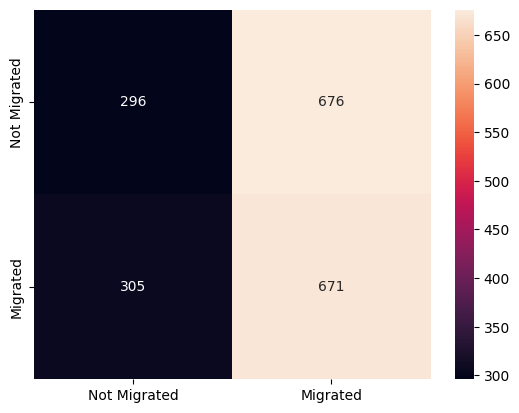

In [353]:
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Not Migrated', 'Migrated'], yticklabels=['Not Migrated', 'Migrated'])

In [354]:
df

,Species,Region,Habitat,Weather_Condition,Migration_Reason,Start_Longitude,End_Longitude,Flight_Distance_km,Flight_Duration_hours,Average_Speed_kmph,...,Rest_Stops,Predator_Sightings,Tag_Type,Migrated_in_Flock,Flock_Size,Food_Supply_Level,Migration_Interrupted,Interrupted_Reason,Migration_Success,Observation_Counts
0,6,5,2,3,3,-169.378251,-21.366879,1753.79,49.5,47.82,...,3,6,1,1,264,1,1,3,0,56
1,4,4,2,3,1,-111.475069,47.963436,3263.05,46.1,48.41,...,2,3,1,1,212,0,1,0,1,61
3,6,5,4,3,2,153.104341,-157.868744,2317.38,58.7,55.38,...,8,5,0,0,484,2,1,1,1,68
4,0,3,4,4,0,106.674824,-115.022863,3077.38,56.9,53.92,...,11,3,0,0,184,1,0,4,0,67
5,3,3,2,3,2,138.292231,-175.116068,2987.62,52.9,52.39,...,5,8,0,1,451,0,0,1,0,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,5,4,2,87.638661,-1.283046,2357.69,52.4,57.77,...,9,3,1,0,172,0,1,2,1,59
9996,3,3,1,4,0,2.850794,-77.025629,2901.75,60.5,52.59,...,12,7,2,0,496,2,1,2,0,82
9997,2,3,5,3,0,-32.037925,-13.844319,3019.80,57.8,44.25,...,10,8,2,0,375,2,0,1,0,66
9998,0,5,3,3,1,84.837740,-74.675591,2663.78,54.8,55.33,...,1,6,2,1,227,2,1,1,1,18


In [355]:
df_updated1.columns

Index(['Species', 'Region', 'Weather_Condition', 'Flight_Distance_km',
       'Humidity_%', 'Rest_Stops', 'Migrated_in_Flock', 'Food_Supply_Level',
       'Migration_Interrupted', 'Migration_Success'],
      dtype='object')